# Data Understanding

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
df_=pd.read_csv("Flo.csv")

In [3]:
df = df_.copy()

## Exploratory Data Analyse (EDA)

In [4]:
df.head()

,ID,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4,1,"139,99","799,38",[KADIN]
1,1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19,2,"159,97","1853,58","[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,10,ae608ece-c9d8-11ea-a31e-000d3a38a36f,Ios App,Offline,2020-07-19,2020-07-25,2020-07-19,2020-07-25,1,1,"74,99","39,99","[AKTIFCOCUK, COCUK, KADIN]"
3,100,b74c85fa-43a0-11eb-806e-000d3a38a36f,Android App,Offline,2020-02-22,2021-03-03,2020-12-21,2021-03-03,6,4,"334,96","564,88",[COCUK]
4,1000,04064990-a414-11e9-a2fc-000d3a38a36f,Android App,Android App,2019-04-12,2020-07-30,2020-07-30,2020-03-10,1,4,"269,96","84,99",[ERKEK]


In [5]:
df.shape

(19945, 13)

In [6]:
df.info

<bound method DataFrame.info of          ID                             master_id order_channel  \
0         0  cc294636-19f0-11eb-8d74-000d3a38a36f   Android App   
1         1  f431bd5a-ab7b-11e9-a2fc-000d3a38a36f   Android App   
2        10  ae608ece-c9d8-11ea-a31e-000d3a38a36f       Ios App   
3       100  b74c85fa-43a0-11eb-806e-000d3a38a36f   Android App   
4      1000  04064990-a414-11e9-a2fc-000d3a38a36f   Android App   
...     ...                                   ...           ...   
19940  9995  90097bc8-8a01-11ea-8ec0-000d3a38a36f       Ios App   
19941  9996  883b6e7e-a89d-11e9-a2fc-000d3a38a36f        Mobile   
19942  9997  d3b6667c-20f4-11ea-b50a-000d3a38a36f   Android App   
19943  9998  d4d8b762-b14b-11e9-9757-000d3a38a36f        Mobile   
19944  9999  b46e2e08-5434-11ea-b1db-000d3a38a36f        Mobile   

      last_order_channel first_order_date last_order_date  \
0                Offline       2020-10-30      2021-02-26   
1                 Mobile       2017-02-08

In [7]:
df.dtypes

ID                                    int64
master_id                            object
order_channel                        object
last_order_channel                   object
first_order_date                     object
last_order_date                      object
last_order_date_online               object
last_order_date_offline              object
order_num_total_ever_online           int64
order_num_total_ever_offline          int64
customer_value_total_ever_offline    object
customer_value_total_ever_online     object
interested_in_categories_12          object
dtype: object

In [8]:
df.isnull().sum()

ID                                   0
master_id                            0
order_channel                        0
last_order_channel                   0
first_order_date                     0
last_order_date                      0
last_order_date_online               0
last_order_date_offline              0
order_num_total_ever_online          0
order_num_total_ever_offline         0
customer_value_total_ever_offline    0
customer_value_total_ever_online     0
interested_in_categories_12          0
dtype: int64

#### Data Cleaning and Preprocessing

1) Data Parsing
2) Value Conversion
3) Null Values (it's already checked above)

In [9]:
print(df["first_order_date"].dtype)
print(df["last_order_date"].dtype)
print(df["last_order_date_online"].dtype)
print(df["last_order_date_offline"].dtype)

object
object
object
object


In [10]:
#Converting date columns to datetime type for easier manipulation and analysis.

df["first_order_date"] = pd.to_datetime(df["first_order_date"]) 
df["last_order_date"] = pd.to_datetime(df["last_order_date"])
df["last_order_date_online"] = pd.to_datetime(df["last_order_date_online"])
df["last_order_date_offline"] = pd.to_datetime(df["last_order_date_offline"])

In [11]:
print(df["last_order_date_offline"].dtype)
print(df["last_order_date_online"].dtype)
print(df["last_order_date"].dtype)
print(df["first_order_date"].dtype)

datetime64[ns]
datetime64[ns]
datetime64[ns]
datetime64[ns]


In [12]:
df['customer_value_total_ever_offline'] = df['customer_value_total_ever_offline'].str.replace(',', '.')
## Convert commas to points(.)

df['customer_value_total_ever_offline'] = df['customer_value_total_ever_offline'].astype(float)
## Convert values to float type

In [13]:
df['customer_value_total_ever_online'] =df['customer_value_total_ever_online'].str.replace(',','.')
## Convert commas to points(.)
df['customer_value_total_ever_online'] = df['customer_value_total_ever_online'].astype(float)
## Convert values to float type

In [14]:
print(df["customer_value_total_ever_online"].dtype)
print(df["customer_value_total_ever_offline"].dtype)

float64
float64


In [15]:
# we filter, otherwise datetime columns will be displayed with describe function.
filtered_data = df[['order_num_total_ever_online',    
                      'order_num_total_ever_offline', 
                      'customer_value_total_ever_offline', 
                      'customer_value_total_ever_online']]

In [16]:
descriptive_stats_filtered = filtered_data.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9, 0.99]).T
descriptive_stats_filtered #We can observe outliers here

,count,mean,std,min,10%,25%,50%,75%,90%,99%,max
order_num_total_ever_online,19945.0,3.110855,4.225647,1.00,1.00,1.00,2.00,4.00,7.000,20.0000,200.00
order_num_total_ever_offline,19945.0,1.913913,2.062880,1.00,1.00,1.00,1.00,2.00,4.000,7.0000,109.00
customer_value_total_ever_offline,19945.0,253.922597,301.532853,10.00,59.99,99.99,179.98,319.97,519.950,1219.9468,18119.14
customer_value_total_ever_online,19945.0,497.321690,832.601886,12.99,84.99,149.98,286.46,578.44,1082.036,3143.8104,45220.13


###### Overview:

1) Order Numbers:

* Online Orders:
Mean: 3.11
Standard Deviation: 4.23
Minimum: 1
Maximum: 200

* Offline Orders:
 Mean: 1.91
 Standard Deviation: 2.06
 Minimum: 1
 Maximum: 109

2) Customer Value:

* Total Offline Customer Value:
Mean: 253.923	
Standard Deviation: 301.533
Minimum: 10
Maximum: 18119.140

* Total Online Customer Value:
Mean: 497.322
Standard Deviation: 832.602	
Minimum: 12.990	
Maximum: 45220.130

The data shows a wide range in both order numbers and customer value, indicating variability in customer purchasing behavior.

In [17]:
print(df["order_channel"].unique()) # values in order channel

['Android App' 'Ios App' 'Mobile' 'Desktop']


In [18]:
print(df["last_order_channel"].unique())  # values in last_order_channel (unlike order_channel available "Offline")

['Offline' 'Mobile' 'Android App' 'Desktop' 'Ios App']


In [19]:
print(df["last_order_channel"].value_counts()) # How many of each value are in last_order_channel

last_order_channel
Android App    6783
Offline        6608
Mobile         3172
Ios App        1696
Desktop        1686
Name: count, dtype: int64


In [20]:
df["order_num_total_ever_online"].sum() # total number of online orders

62046

In [21]:
df["order_num_total_ever_offline"].sum() #total number of offline orders

38173

In [22]:
round(df["customer_value_total_ever_online"].sum(),0)  #Total online customer value

9919081.0

In [23]:
round(df["customer_value_total_ever_offline"].sum(),0)

5064486.0

In [24]:
df.describe(include='O').T   #Descriptive Statistics for Object types

,count,unique,top,freq
master_id,19945,19945,cc294636-19f0-11eb-8d74-000d3a38a36f,1
order_channel,19945,4,Android App,9495
last_order_channel,19945,5,Android App,6783
interested_in_categories_12,19945,32,[AKTIFSPOR],3464


In [25]:
# More Descriptive Statistics

print("median: ",filtered_data.median())
print("---------------------------")
print("mod: ",filtered_data.mode().iloc[0])
print("---------------------------")
print("range: ",filtered_data.max() - filtered_data.min())
print("---------------------------")
print("skewness: ",filtered_data.skew())
print("---------------------------")
print("variance: ",filtered_data.var())

median:  order_num_total_ever_online            2.00
order_num_total_ever_offline           1.00
customer_value_total_ever_offline    179.98
customer_value_total_ever_online     286.46
dtype: float64
---------------------------
mod:  order_num_total_ever_online           1.00
order_num_total_ever_offline          1.00
customer_value_total_ever_offline    99.99
customer_value_total_ever_online     89.99
Name: 0, dtype: float64
---------------------------
range:  order_num_total_ever_online            199.00
order_num_total_ever_offline           108.00
customer_value_total_ever_offline    18109.14
customer_value_total_ever_online     45207.14
dtype: float64
---------------------------
skewness:  order_num_total_ever_online          10.488483
order_num_total_ever_offline         20.329597
customer_value_total_ever_offline    16.300748
customer_value_total_ever_online     20.085790
dtype: float64
---------------------------
variance:  order_num_total_ever_online              17.856092
ord

In [26]:
# Skewness: Verinin çarpıklığını ve simetrikliğini gösterir. Verinin sağa mı sola mı çarpık olduğunu ve bu çarpıklığın derecesini belirtir.

# Variance: Verinin yayılımını ve değişkenliğini gösterir. Verinin ortalama etrafında ne kadar dağıldığını ve değerlerin 
# birbirinden ne kadar farklı olduğunu belirtir.

In [27]:
# Yüksek Varyans: Veri setindeki değerler ortalama etrafında geniş bir aralığa yayılmıştır.Değerler arasındaki farklılıklar büyüktür.

# Pozitif Skewness (Sağa Çarpık): Dağılımın çoğunluğu düşük değerlerdedir ve veri setinde birkaç yüksek değer vardır.

array([[<Axes: title={'center': 'first_order_date'}>]], dtype=object)

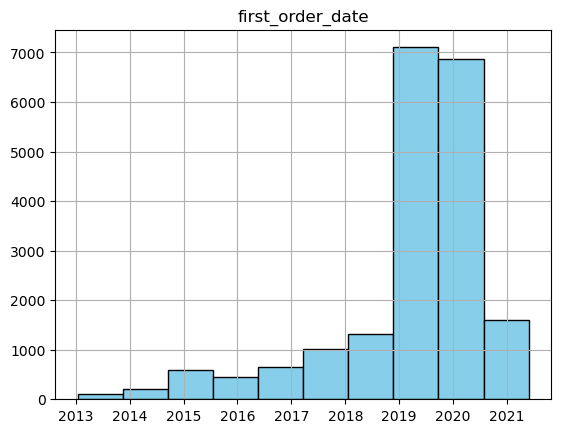

In [28]:
df.hist("first_order_date",color = "skyblue", ec="black", lw=1)

array([[<Axes: title={'center': 'last_order_date'}>]], dtype=object)

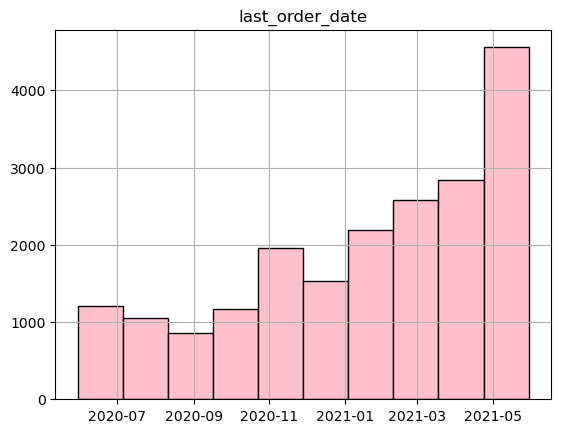

In [29]:
df.hist("last_order_date",color = "pink", ec="black", lw=1)

array([[<Axes: title={'center': 'order_num_total_ever_online'}>]],
      dtype=object)

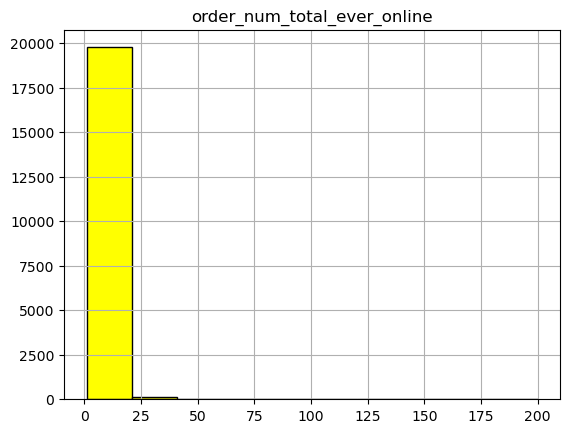

In [30]:
df.hist("order_num_total_ever_online",color = "yellow", ec="black", lw=1)

array([[<Axes: title={'center': 'order_num_total_ever_offline'}>]],
      dtype=object)

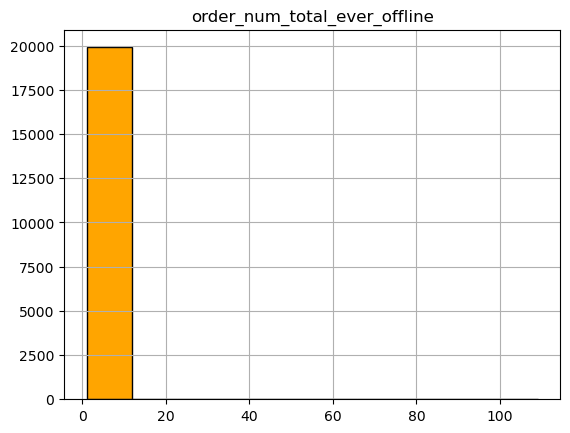

In [31]:
df.hist("order_num_total_ever_offline",color = "orange", ec="black", lw=1)

###### Summary:
* When we first look at the histograms above, the first order date is between 2013 and 2021. We can also see the increased columns in the histogram in 2019 and 2020. 
* The last order date histogram covers a relatively shorter range (about 2 years) and we can see a more balanced chart compared to the first order date.

* When we examine the histogram of the total number of online and offline orders, we can observe that the diversity in the total number of online orders is greater.

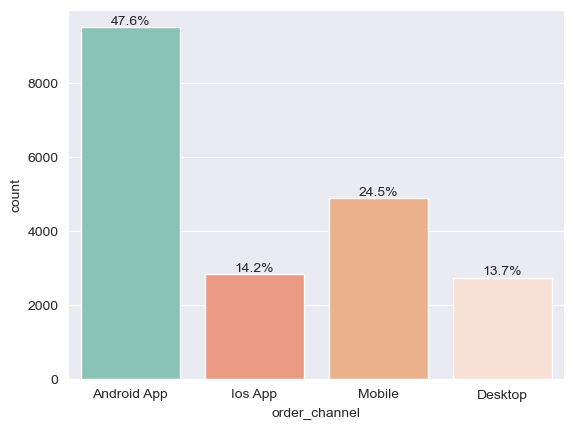

In [32]:
sns.set_style("darkgrid")
ax = sns.countplot(x = df['order_channel'], palette=["#7fcdbb","#fc9272","#FAAE7B","#fee0d2"])
# get the total count of the type column
total = df['order_channel'].count()

# annotate the bars with fmt from matplotlib v3.7.0
ax.bar_label(ax.containers[0], fmt=lambda x: f'{(x/total)*100:0.1f}%')
plt.show()

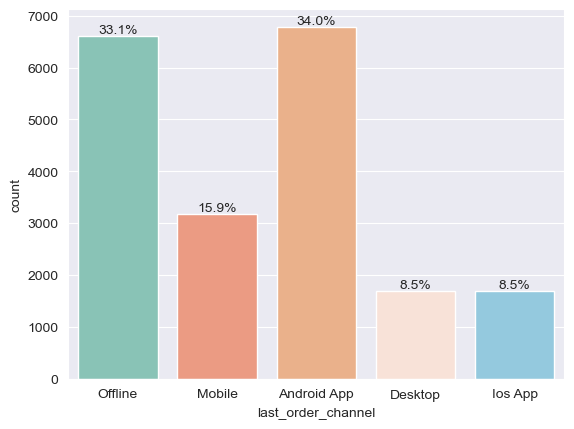

In [33]:
sns.set_style("darkgrid")
ax = sns.countplot(x = df['last_order_channel'], palette=["#7fcdbb","#fc9272","#FAAE7B","#fee0d2","skyblue"])
# get the total count of the type column
total = df['last_order_channel'].count()

# annotate the bars with fmt from matplotlib v3.7.0
ax.bar_label(ax.containers[0], fmt=lambda x: f'{(x/total)*100:0.1f}%')
plt.show()

###### Division into Categories


In [34]:
categoric_cols = [col for col in df.columns if df[col].dtypes == "O" and col not in ["master_id"]]

In [35]:
numeric_cols= [col for col in df.columns if df[col].dtypes != "O" and col not in ['ID', 'first_order_date', 'last_order_date', 'last_order_date_online', 'last_order_date_offline']]

,order_channel,Ratio
order_channel,,
Android App,9495,47.605916
Mobile,4882,24.477313
Ios App,2833,14.204061
Desktop,2735,13.712710


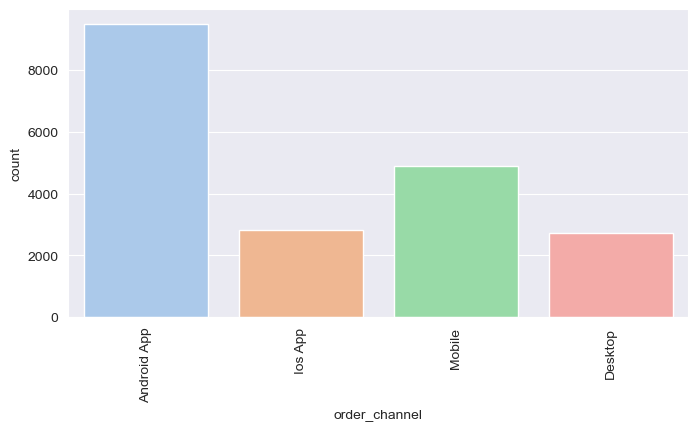

,last_order_channel,Ratio
last_order_channel,,
Android App,6783,34.008523
Offline,6608,33.131111
Mobile,3172,15.903735
Ios App,1696,8.503384
Desktop,1686,8.453246


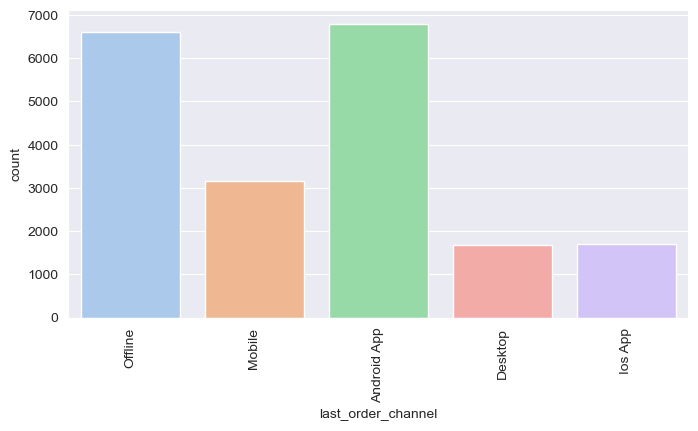

,interested_in_categories_12,Ratio
interested_in_categories_12,,
[AKTIFSPOR],3464,17.367761
[KADIN],2158,10.819754
[],2135,10.704437
[ERKEK],1973,9.892204
"[KADIN, AKTIFSPOR]",1352,6.778641
"[ERKEK, AKTIFSPOR]",1178,5.906242
"[ERKEK, KADIN]",848,4.251692
[COCUK],836,4.191527
"[ERKEK, KADIN, AKTIFSPOR]",775,3.885686


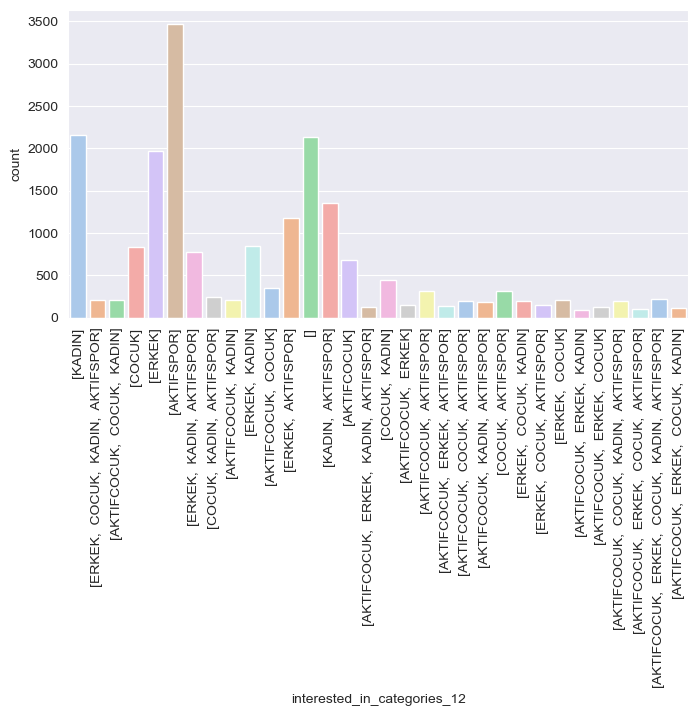

In [36]:
for col in categoric_cols:
    display(pd.DataFrame({col:df[col].value_counts(),
                         "Ratio":100*df[col].value_counts()/len(df)}))
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, data=df, palette="pastel")
    plt.xticks(rotation=90)
    plt.show()

In [37]:
quantiles = [0.01, 0.05, 0.25, 0.50, 0.75, 0.95, 0.99]

count    19945.000000
mean         3.110855
std          4.225647
min          1.000000
1%           1.000000
5%           1.000000
25%          1.000000
50%          2.000000
75%          4.000000
95%         10.000000
99%         20.000000
max        200.000000
Name: order_num_total_ever_online, dtype: float64


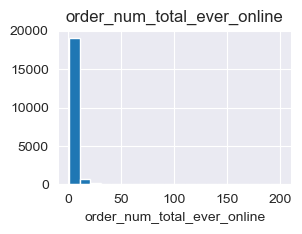

count    19945.000000
mean         1.913913
std          2.062880
min          1.000000
1%           1.000000
5%           1.000000
25%          1.000000
50%          1.000000
75%          2.000000
95%          4.000000
99%          7.000000
max        109.000000
Name: order_num_total_ever_offline, dtype: float64


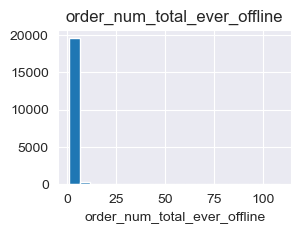

count    19945.000000
mean       253.922597
std        301.532853
min         10.000000
1%          19.990000
5%          39.990000
25%         99.990000
50%        179.980000
75%        319.970000
95%        694.222000
99%       1219.946800
max      18119.140000
Name: customer_value_total_ever_offline, dtype: float64


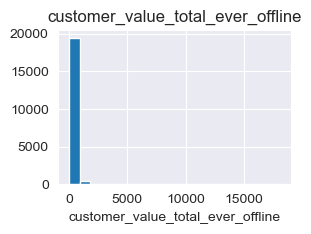

count    19945.000000
mean       497.321690
std        832.601886
min         12.990000
1%          39.990000
5%          63.990000
25%        149.980000
50%        286.460000
75%        578.440000
95%       1556.726000
99%       3143.810400
max      45220.130000
Name: customer_value_total_ever_online, dtype: float64


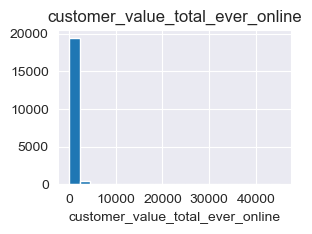

In [38]:
for col in numeric_cols:
    print(df[col].describe(quantiles).T)

    plt.figure(figsize=(3, 2))
    df[col].hist(bins=20)
    plt.xlabel(col)
    plt.title(col)
    plt.show()

##### Correlation Analysis

In [39]:
df[numeric_cols].corr()

,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online
order_num_total_ever_online,1.000000,0.021894,0.003018,0.816057
order_num_total_ever_offline,0.021894,1.000000,0.691495,0.011197
customer_value_total_ever_offline,0.003018,0.691495,1.000000,0.035046
customer_value_total_ever_online,0.816057,0.011197,0.035046,1.000000


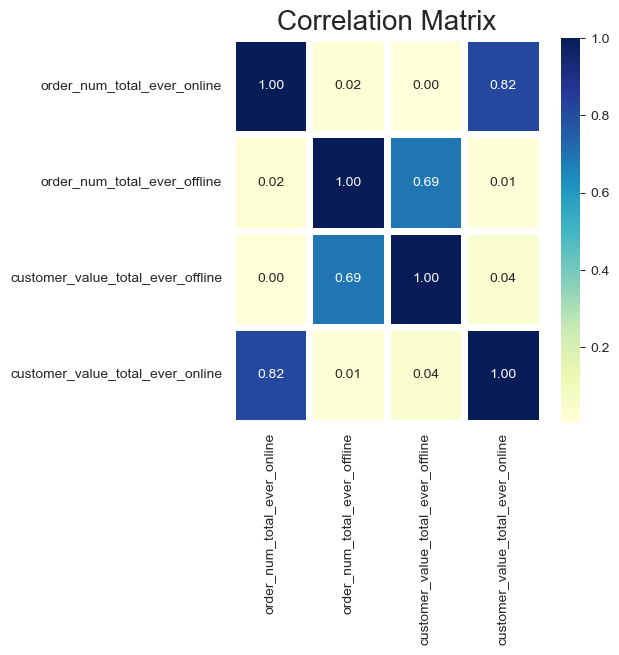

In [40]:
f, ax = plt.subplots(figsize=[5, 5])
sns.heatmap(df[numeric_cols].corr(), annot=True, fmt=".2f", ax=ax, cmap="YlGnBu", linewidths=5)
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

#### Base Model (It will be used later in Supervised approach)

In [41]:
dfBase=df.copy()

In [42]:
# Missing Values Control
dfBase.isnull().sum()

ID                                   0
master_id                            0
order_channel                        0
last_order_channel                   0
first_order_date                     0
last_order_date                      0
last_order_date_online               0
last_order_date_offline              0
order_num_total_ever_online          0
order_num_total_ever_offline         0
customer_value_total_ever_offline    0
customer_value_total_ever_online     0
interested_in_categories_12          0
dtype: int64

### Time Series Analysis

In [43]:
df_TimeSeries= df.copy()

In [44]:
df_TimeSeries.isnull().sum()

ID                                   0
master_id                            0
order_channel                        0
last_order_channel                   0
first_order_date                     0
last_order_date                      0
last_order_date_online               0
last_order_date_offline              0
order_num_total_ever_online          0
order_num_total_ever_offline         0
customer_value_total_ever_offline    0
customer_value_total_ever_online     0
interested_in_categories_12          0
dtype: int64

In [45]:
# Boş değerleri kontrol edip temizleme adımı
# df_TimeSeries = df_TimeSeries.dropna(subset=['first_order_date', 'last_order_date', 'last_order_date_online', 'last_order_date_offline'])

In [46]:
# Müşterilerin toplam sipariş sayısını hesapladım
df_TimeSeries['total_orders'] = df_TimeSeries['order_num_total_ever_online'] + df_TimeSeries['order_num_total_ever_offline']

In [47]:
# Prophet modeline uygun hale getirmek için farklı tarih sütunlarına göre aylık toplam sipariş ve değerlerinin hesaplanma adımı
first_order_monthly = df_TimeSeries.set_index('first_order_date').resample('M')['total_orders'].sum().reset_index(name='y')
last_order_monthly = df_TimeSeries.set_index('last_order_date').resample('M')['total_orders'].sum().reset_index(name='y')

In [48]:
!pip install prophet
# Prophet, Facebook tarafından geliştirilen ve özellikle iş zaman serisi verileriyle iyi sonuçlar veren bir model. 
# Prophet, sezonluk ve trend bileşenlerini otomatik olarak modelleyebilir.

In [49]:
# Prophet modeline uygun hale getirmek için sütun adlarını 'ds' ve 'y' olarak değiştirdim
first_order_monthly.columns = ['ds', 'y']
last_order_monthly.columns = ['ds', 'y']

In [50]:
from prophet import Prophet

# Tahmin fonksiyonu
def fit_and_forecast(df_TimeSeries, periods, freq='M'):
    model = Prophet()
    model.fit(df_TimeSeries)
    future = model.make_future_dataframe(periods=periods, freq=freq)
    forecast = model.predict(future)
    return model, forecast

In [51]:
# Grafik çizim fonksiyonu
def plot_forecast(model, forecast, title):
    fig = model.plot(forecast)
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Total Orders')
    plt.show()

In [52]:
# İlk sipariş tarihine göre model oluşturma ve tahmin yapma
model_first, forecast_first = fit_and_forecast(first_order_monthly, periods=12, freq='M')

23:05:06 - cmdstanpy - INFO - Chain [1] start processing
23:05:06 - cmdstanpy - INFO - Chain [1] done processing


In [53]:
# Son sipariş tarihine göre model oluşturma ve tahmin yapma
model_last, forecast_last = fit_and_forecast(last_order_monthly, periods=12, freq='M')

23:05:06 - cmdstanpy - INFO - Chain [1] start processing
23:05:06 - cmdstanpy - INFO - Chain [1] done processing


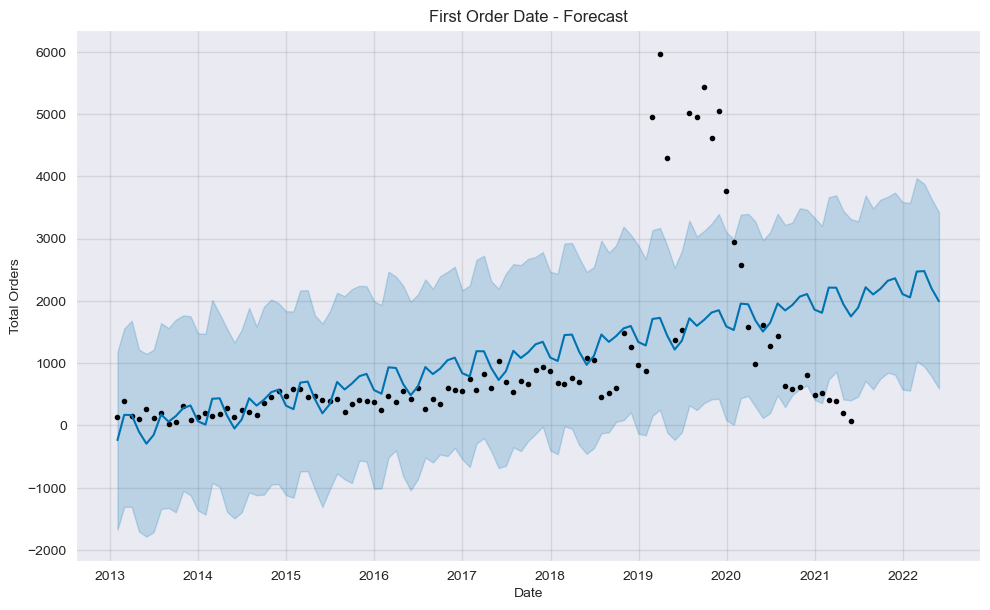

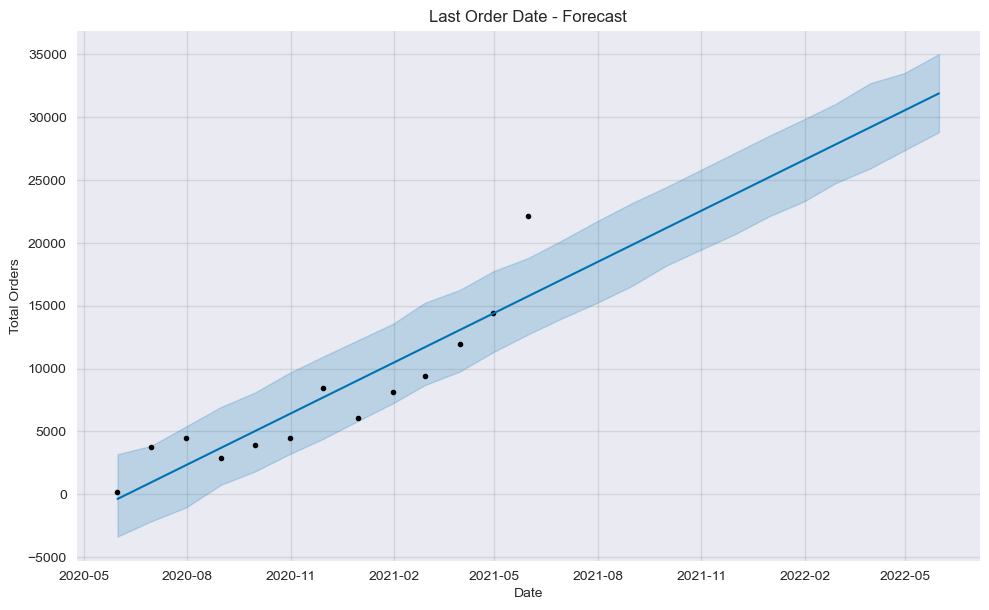

In [54]:
# Tahminleri çizme
plot_forecast(model_first, forecast_first, 'First Order Date - Forecast')
plot_forecast(model_last, forecast_last, 'Last Order Date - Forecast')

##### Grafik Yorumu
* Mavi Çizgi: Modelin tahmin ettiği trendi gösterir. Bu çizgi, toplam siparişlerin zaman içindeki genel eğilimini temsil eder.
* Mavi Gölge Alan: Bu alan, tahminlerin belirsizlik aralığını gösterir. Daha açık mavi renkteki alan, tahminlerin yüzde 95 güven aralığını ifade eder. Tahminlerin bu aralıkta olması beklenir.
* Siyah Noktalar: Gerçek veri noktalarını temsil eder. Bu noktalar, modelin tahmin ettiği değerlere ne kadar yakın olduğunu gösterir.

#### Feature Engineering (Modellerimizdeki performansları artırabilmek için)



In [55]:
# Analiz tarihi belirlemek 
analysis_date = df['last_order_date'].max() + pd.DateOffset(days=2) # son sipariş tarihinden sonra iki gün ekledim.

In [56]:
# Toplam Sipariş Sayısı
df['order_num_total'] = df['order_num_total_ever_online'] + df['order_num_total_ever_offline']

# Toplam Harcama Miktarı
df['customer_value_total'] = df['customer_value_total_ever_online'] + df['customer_value_total_ever_offline']

# Sipariş Sıklığı
df['frequency_ratio_in_days'] = (df['last_order_date'] - df['first_order_date']).dt.days / df['order_num_total']

# Online Harcama Oranı
df['online_spending_ratio'] = df['customer_value_total_ever_online'] / df['customer_value_total']

# Offline Harcama Oranı
df['offline_spending_ratio'] = df['customer_value_total_ever_offline'] / df['customer_value_total']

#Kategori Sayısı
df['num_interested_categories'] = df['interested_in_categories_12'].apply(lambda x: len(x.strip('[]').split(',')))

#Recency
df['recency'] = (analysis_date - df['last_order_date']).dt.days

#Frequency
df['frequency'] = df['order_num_total']

#Basket Size
df['basket_size'] = df['customer_value_total'] / df['order_num_total']

#Tenure
df['tenure'] = (analysis_date - df['first_order_date']).dt.days

#Channel Loyalty Online&Offline
df['channel_loyalty'] = df[['order_num_total_ever_online', 'order_num_total_ever_offline']].idxmax(axis=1)

#Channel Loyalty 1&0
df['channel_loyalty_2'] = (df['order_channel'] == df['last_order_channel']).astype(int)

# Value Ratio Online/Offline
df['value_ratio_online_offline'] = df['customer_value_total_ever_online'] / df['customer_value_total_ever_offline']

#Order Ratio Online/Offline
df['order_ratio_online_offline'] = df['order_num_total_ever_online'] / df['order_num_total_ever_offline']

#Customer Lifetime
df['customer_lifetime'] = (df['last_order_date'] - df['first_order_date']).dt.days

#Offline Last Order Recency
df['offline_last_order_recency'] = (analysis_date - df['last_order_date_offline']).dt.days

#Online Last Order Recency
df['online_last_order_recency'] = (analysis_date - df['last_order_date_online']).dt.days

#Online Order Frequency
df['online_order_frequency'] = df['order_num_total_ever_online'] / df['customer_lifetime']

#Offline Order Frequency
df['offline_order_frequency'] = df['order_num_total_ever_offline'] / df['customer_lifetime']

#Loyalty Score
df['loyalty_score'] = (df['order_num_total'] * df['customer_value_total']) / df['tenure']

#IsActiveCustomer
df['is_active_customer'] = df['last_order_date'] > analysis_date - pd.Timedelta(days=90)
# df['is_active_customer'] = (df['last_order_date'] > analysis_date - pd.Timedelta(days=90)).astype(int)

#Churn
df['churn'] = np.where((analysis_date - df['last_order_date']).dt.days > 365, 1, 0)

In [57]:
df.head()

,ID,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,...,value_ratio_online_offline,order_ratio_online_offline,customer_lifetime,offline_last_order_recency,online_last_order_recency,online_order_frequency,offline_order_frequency,loyalty_score,is_active_customer,churn
0,0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4,1,...,5.710265,4.00,119,95,100,0.033613,0.008403,21.947897,False,0
1,1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19,2,...,11.587048,9.50,1469,508,105,0.012934,0.001361,26.864390,False,0
2,10,ae608ece-c9d8-11ea-a31e-000d3a38a36f,Ios App,Offline,2020-07-19,2020-07-25,2020-07-19,2020-07-25,1,1,...,0.533271,1.00,6,311,317,0.166667,0.166667,0.725426,False,0
3,100,b74c85fa-43a0-11eb-806e-000d3a38a36f,Android App,Offline,2020-02-22,2021-03-03,2020-12-21,2021-03-03,6,4,...,1.686410,1.50,375,90,162,0.016000,0.010667,19.351398,False,0
4,1000,04064990-a414-11e9-a2fc-000d3a38a36f,Android App,Android App,2019-04-12,2020-07-30,2020-07-30,2020-03-10,1,4,...,0.314824,0.25,475,448,306,0.002105,0.008421,2.272407,False,0


In [58]:
import warnings
warnings.simplefilter(action="ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 170)
#pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.options.mode.chained_assignment = None 

In [59]:
df.head(10)


,ID,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,order_num_total,customer_value_total,frequency_ratio_in_days,online_spending_ratio,offline_spending_ratio,num_interested_categories,recency,frequency,basket_size,tenure,channel_loyalty,channel_loyalty_2,value_ratio_online_offline,order_ratio_online_offline,customer_lifetime,offline_last_order_recency,online_last_order_recency,online_order_frequency,offline_order_frequency,loyalty_score,is_active_customer,churn
0,0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4,1,139.99,799.38,[KADIN],5,939.37,23.80,0.85,0.15,1,95,5,187.87,214,order_num_total_ever_online,0,5.71,4.00,119,95,100,0.03,0.01,21.95,False,0
1,1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19,2,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",21,2013.55,69.95,0.92,0.08,4,105,21,95.88,1574,order_num_total_ever_online,0,11.59,9.50,1469,508,105,0.01,0.00,26.86,False,0
2,10,ae608ece-c9d8-11ea-a31e-000d3a38a36f,Ios App,Offline,2020-07-19,2020-07-25,2020-07-19,2020-07-25,1,1,74.99,39.99,"[AKTIFCOCUK, COCUK, KADIN]",2,114.98,3.00,0.35,0.65,3,311,2,57.49,317,order_num_total_ever_online,0,0.53,1.00,6,311,317,0.17,0.17,0.73,False,0
3,100,b74c85fa-43a0-11eb-806e-000d3a38a36f,Android App,Offline,2020-02-22,2021-03-03,2020-12-21,2021-03-03,6,4,334.96,564.88,[COCUK],10,899.84,37.50,0.63,0.37,1,90,10,89.98,465,order_num_total_ever_online,0,1.69,1.50,375,90,162,0.02,0.01,19.35,False,0
4,1000,04064990-a414-11e9-a2fc-000d3a38a36f,Android App,Android App,2019-04-12,2020-07-30,2020-07-30,2020-03-10,1,4,269.96,84.99,[ERKEK],5,354.95,95.00,0.24,0.76,1,306,5,70.99,781,order_num_total_ever_offline,1,0.31,0.25,475,448,306,0.00,0.01,2.27,False,0
5,10000,bd59f2d2-4e5c-11ea-99ba-000d3a38a36f,Android App,Android App,2019-08-07,2020-05-31,2020-05-31,2019-11-09,1,2,59.98,157.49,[AKTIFSPOR],3,217.47,99.33,0.72,0.28,1,366,3,72.49,664,order_num_total_ever_offline,1,2.63,0.50,298,570,366,0.00,0.01,0.98,False,1
6,10001,57fd74a4-b577-11ea-a78c-000d3a38a36f,Android App,Offline,2020-06-23,2020-10-05,2020-08-26,2020-10-05,2,1,109.99,389.95,"[ERKEK, KADIN, AKTIFSPOR]",3,499.94,34.67,0.78,0.22,3,239,3,166.65,343,order_num_total_ever_online,0,3.55,2.00,104,239,279,0.02,0.01,4.37,False,0
7,10002,4480d882-38f2-11ea-85d6-000d3a38a36f,Mobile,Mobile,2019-11-17,2021-01-05,2021-01-05,2019-11-17,2,1,192.96,267.47,[KADIN],3,460.43,138.33,0.58,0.42,1,147,3,153.48,562,order_num_total_ever_online,1,1.39,2.00,415,562,147,0.00,0.00,2.46,False,0
8,10003,5ac4396e-9f8f-11ea-80cd-000d3a38a36f,Android App,Offline,2020-05-27,2020-12-10,2020-05-27,2020-12-10,1,1,311.23,89.99,[ERKEK],2,401.22,98.50,0.22,0.78,1,173,2,200.61,370,order_num_total_ever_online,0,0.29,1.00,197,173,370,0.01,0.01,2.17,False,0
9,10004,75fd907e-bbb7-11ea-a0c9-000d3a38a36f,Desktop,Desktop,2020-06-30,2020-07-07,2020-07-07,2020-06-30,2,1,130.49,379.96,"[ERKEK, KADIN, AKTIFSPOR]",3,510.45,2.33,0.74,0.26,3,329,3,170.15,336,order_num_total_ever_online,1,2.91,2.00,7,336,329,0.29,0.14,4.56,False,0


In [60]:
df['purchase_frequency'] = df['order_num_total'] / df['customer_lifetime']
# df['CLV'] = df['basket_size'] * df['purchase_frequency'] * df['customer_lifetime']
# df[['basket_size', 'purchase_frequency', 'customer_lifetime', 'CLV']].head()

In [61]:
df.head(5)

,ID,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,order_num_total,customer_value_total,frequency_ratio_in_days,online_spending_ratio,offline_spending_ratio,num_interested_categories,recency,frequency,basket_size,tenure,channel_loyalty,channel_loyalty_2,value_ratio_online_offline,order_ratio_online_offline,customer_lifetime,offline_last_order_recency,online_last_order_recency,online_order_frequency,offline_order_frequency,loyalty_score,is_active_customer,churn,purchase_frequency
0,0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4,1,139.99,799.38,[KADIN],5,939.37,23.80,0.85,0.15,1,95,5,187.87,214,order_num_total_ever_online,0,5.71,4.00,119,95,100,0.03,0.01,21.95,False,0,0.04
1,1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19,2,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",21,2013.55,69.95,0.92,0.08,4,105,21,95.88,1574,order_num_total_ever_online,0,11.59,9.50,1469,508,105,0.01,0.00,26.86,False,0,0.01
2,10,ae608ece-c9d8-11ea-a31e-000d3a38a36f,Ios App,Offline,2020-07-19,2020-07-25,2020-07-19,2020-07-25,1,1,74.99,39.99,"[AKTIFCOCUK, COCUK, KADIN]",2,114.98,3.00,0.35,0.65,3,311,2,57.49,317,order_num_total_ever_online,0,0.53,1.00,6,311,317,0.17,0.17,0.73,False,0,0.33
3,100,b74c85fa-43a0-11eb-806e-000d3a38a36f,Android App,Offline,2020-02-22,2021-03-03,2020-12-21,2021-03-03,6,4,334.96,564.88,[COCUK],10,899.84,37.50,0.63,0.37,1,90,10,89.98,465,order_num_total_ever_online,0,1.69,1.50,375,90,162,0.02,0.01,19.35,False,0,0.03
4,1000,04064990-a414-11e9-a2fc-000d3a38a36f,Android App,Android App,2019-04-12,2020-07-30,2020-07-30,2020-03-10,1,4,269.96,84.99,[ERKEK],5,354.95,95.00,0.24,0.76,1,306,5,70.99,781,order_num_total_ever_offline,1,0.31,0.25,475,448,306,0.00,0.01,2.27,False,0,0.01


In [62]:
df_Yedek=df.copy()

## Outlier Analysis

In [63]:
df.dtypes

ID                                            int64
master_id                                    object
order_channel                                object
last_order_channel                           object
first_order_date                     datetime64[ns]
last_order_date                      datetime64[ns]
last_order_date_online               datetime64[ns]
last_order_date_offline              datetime64[ns]
order_num_total_ever_online                   int64
order_num_total_ever_offline                  int64
customer_value_total_ever_offline           float64
customer_value_total_ever_online            float64
interested_in_categories_12                  object
order_num_total                               int64
customer_value_total                        float64
frequency_ratio_in_days                     float64
online_spending_ratio                       float64
offline_spending_ratio                      float64
num_interested_categories                     int64
recency     

In [64]:
numeric_features = df.select_dtypes(include='number').columns.tolist()
numeric_features.remove('ID')
numeric_features.remove('num_interested_categories')
numeric_features.remove('channel_loyalty_2')
numeric_features.remove('offline_last_order_recency')
numeric_features.remove('online_last_order_recency')
numeric_features.remove('online_order_frequency')
numeric_features.remove('offline_order_frequency')
numeric_features.remove('churn')

In [65]:
categorical_features = df.select_dtypes(include='object').columns.tolist()
categorical_features.remove("master_id")

In [66]:
numeric_features

['order_num_total_ever_online',
 'order_num_total_ever_offline',
 'customer_value_total_ever_offline',
 'customer_value_total_ever_online',
 'order_num_total',
 'customer_value_total',
 'frequency_ratio_in_days',
 'online_spending_ratio',
 'offline_spending_ratio',
 'recency',
 'frequency',
 'basket_size',
 'tenure',
 'value_ratio_online_offline',
 'order_ratio_online_offline',
 'customer_lifetime',
 'loyalty_score',
 'purchase_frequency']

In [67]:
categorical_features

['order_channel',
 'last_order_channel',
 'interested_in_categories_12',
 'channel_loyalty']

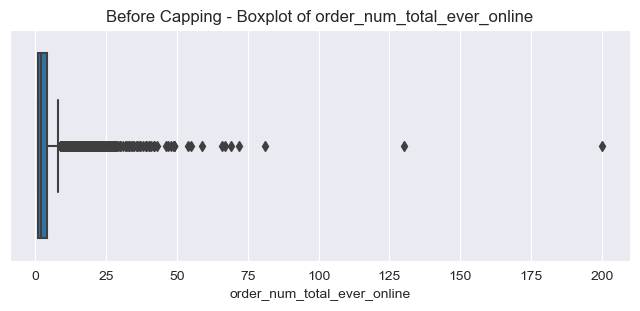

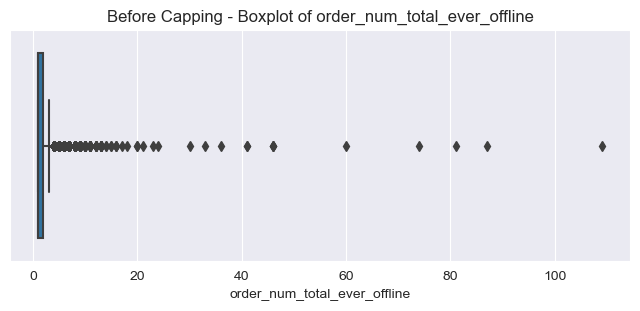

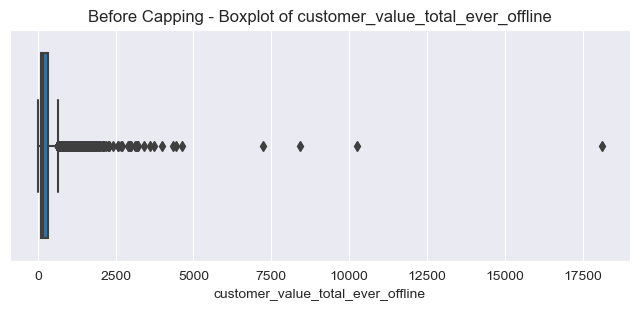

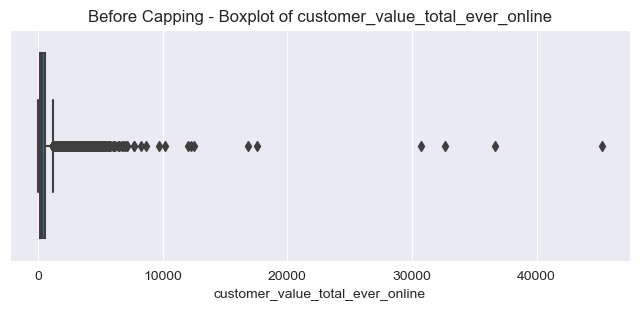

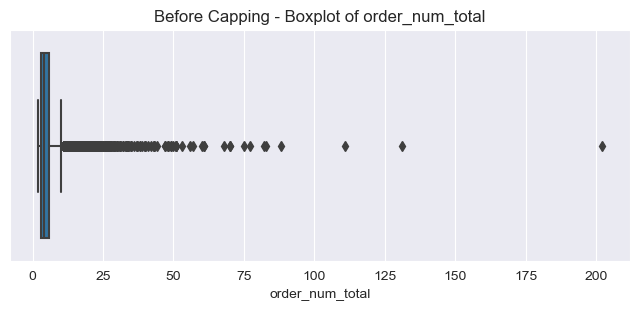

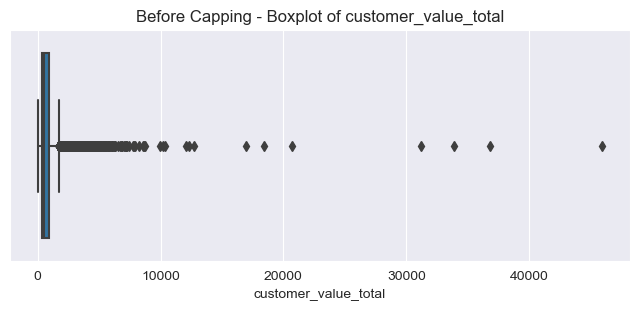

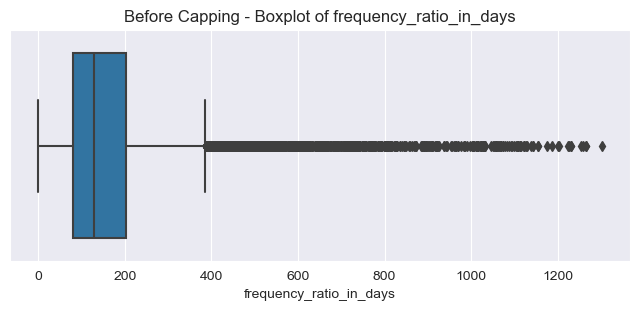

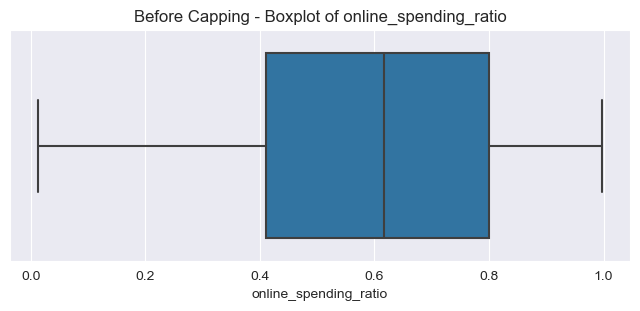

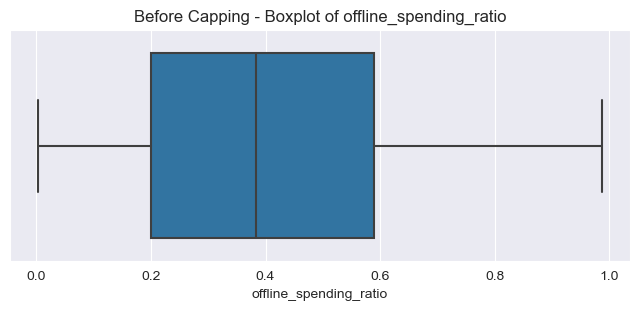

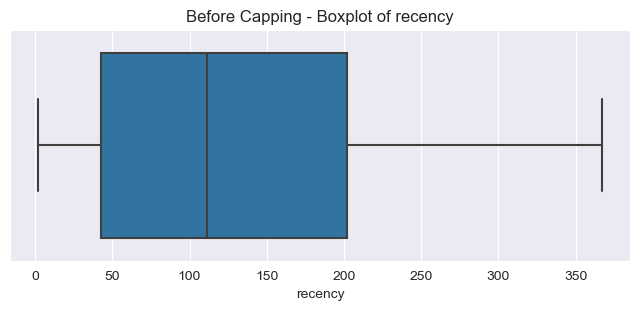

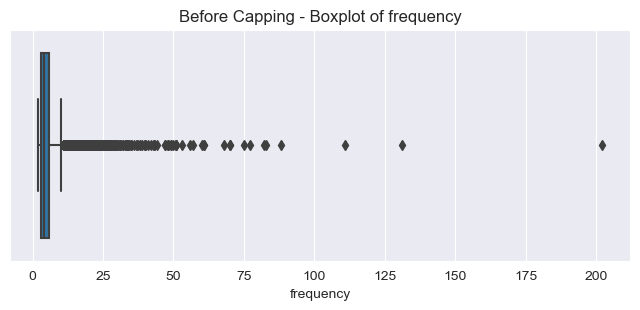

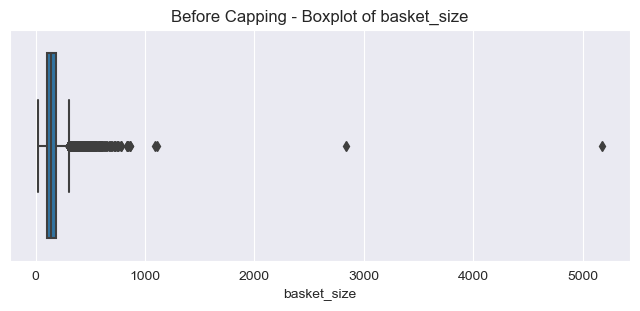

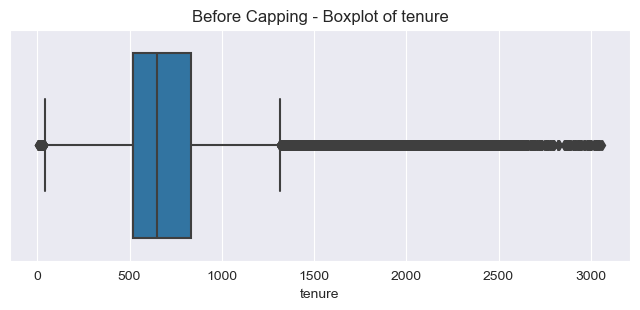

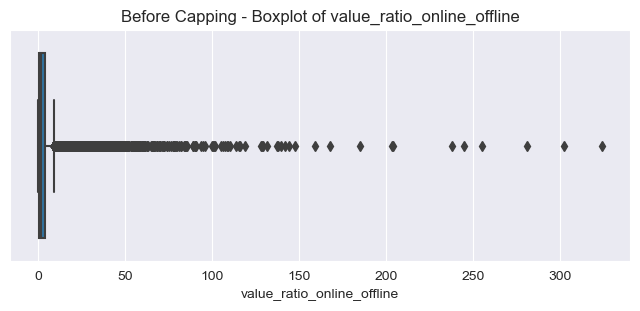

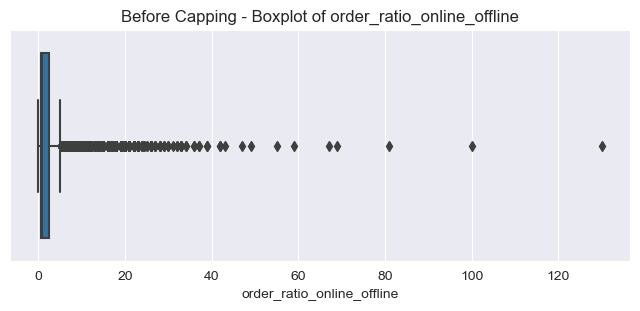

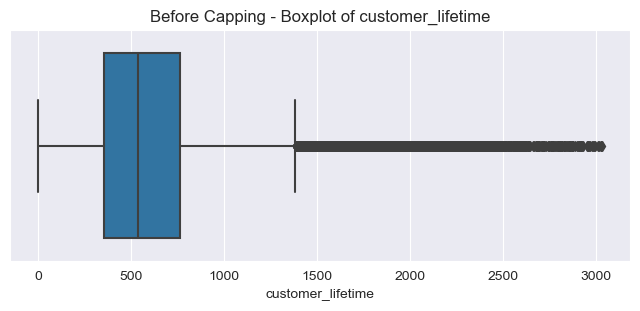

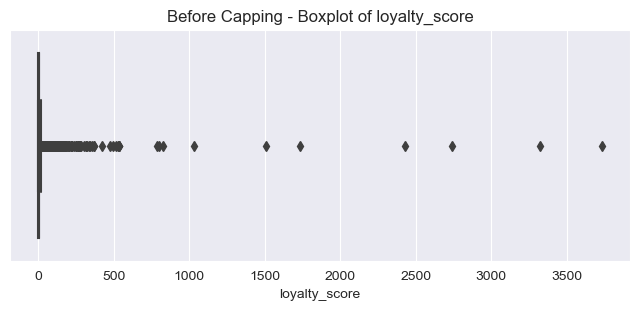

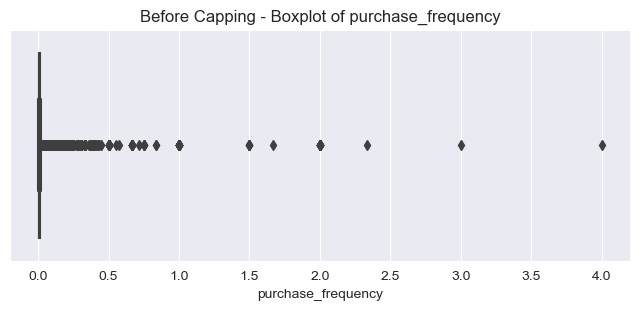

In [68]:
for col in numeric_features:
    plt.figure(figsize=(8, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Before Capping - Boxplot of {col}')
    plt.xticks(rotation=0)
    plt.show()


In [69]:
def cap_outliers_iqr(series):
    Q1 = series.quantile(0.05)
    Q3 = series.quantile(0.95)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series.clip(lower=lower_bound, upper=upper_bound)


In [70]:
capped_data_iqr = df[numeric_features].apply(cap_outliers_iqr)

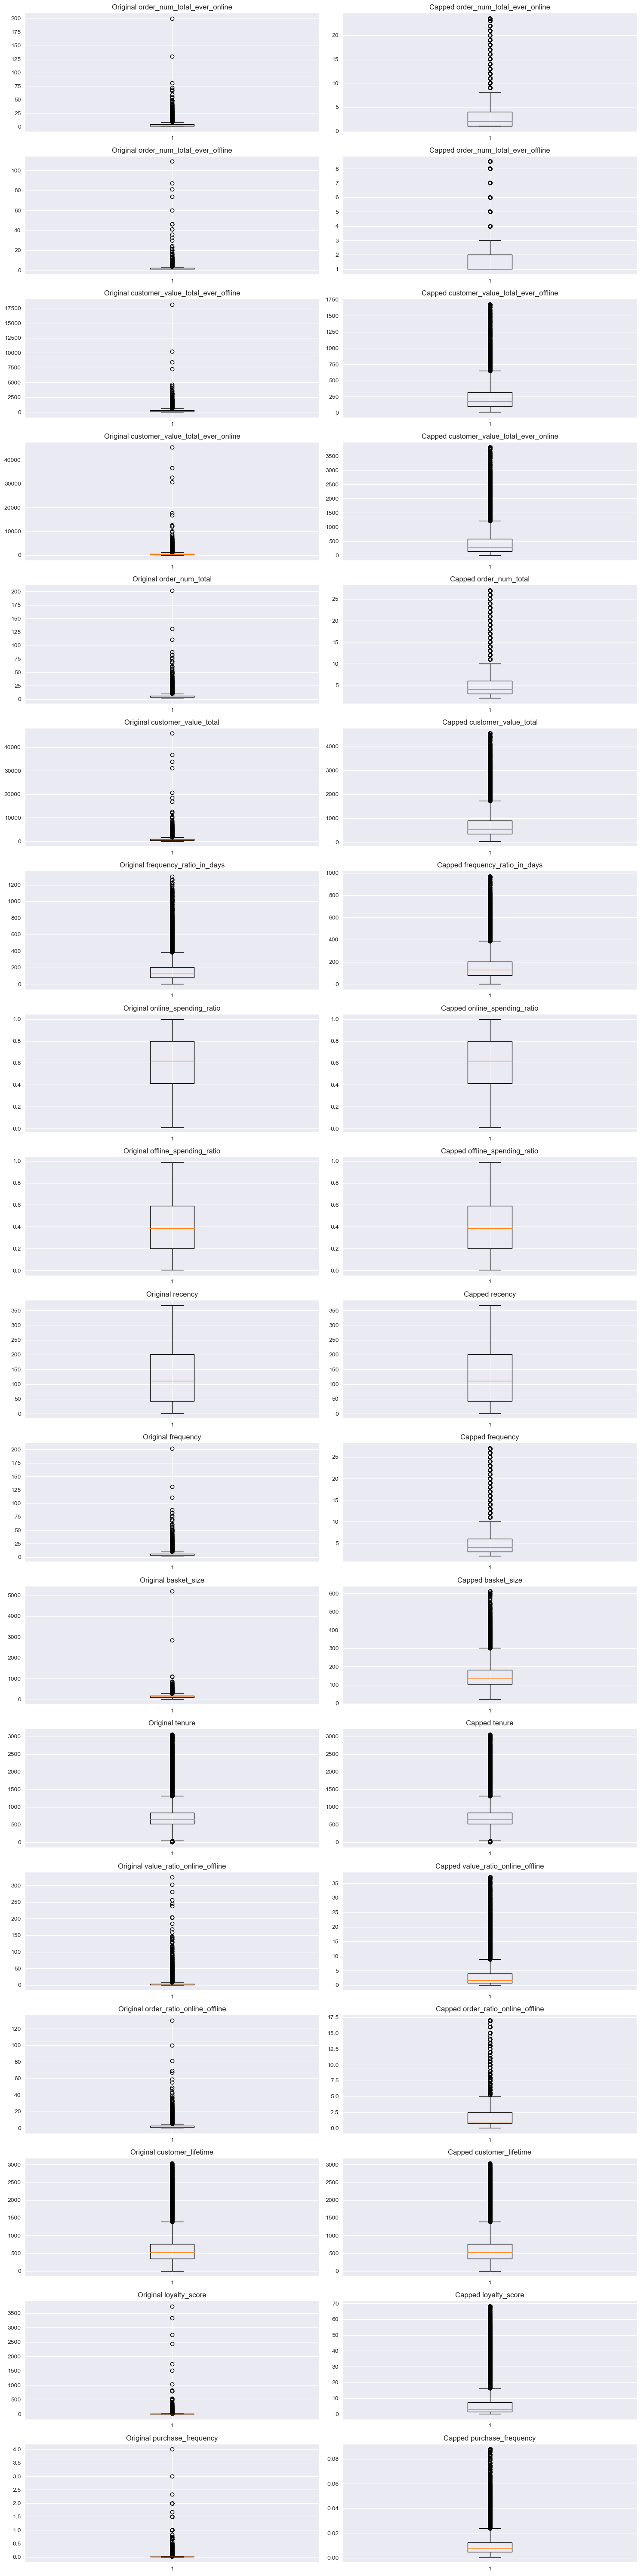

In [71]:
plt.figure(figsize=(15, 60))

# Her bir numeric feature için grafik oluşturun
for i, feature in enumerate(numeric_features):
    plt.subplot(len(numeric_features), 2, 2*i+1)
    plt.boxplot(df[feature].dropna())
    plt.title(f'Original {feature}')
    
    plt.subplot(len(numeric_features), 2, 2*i+2)
    plt.boxplot(capped_data_iqr[feature].dropna())
    plt.title(f'Capped {feature}')

plt.tight_layout()
plt.show()

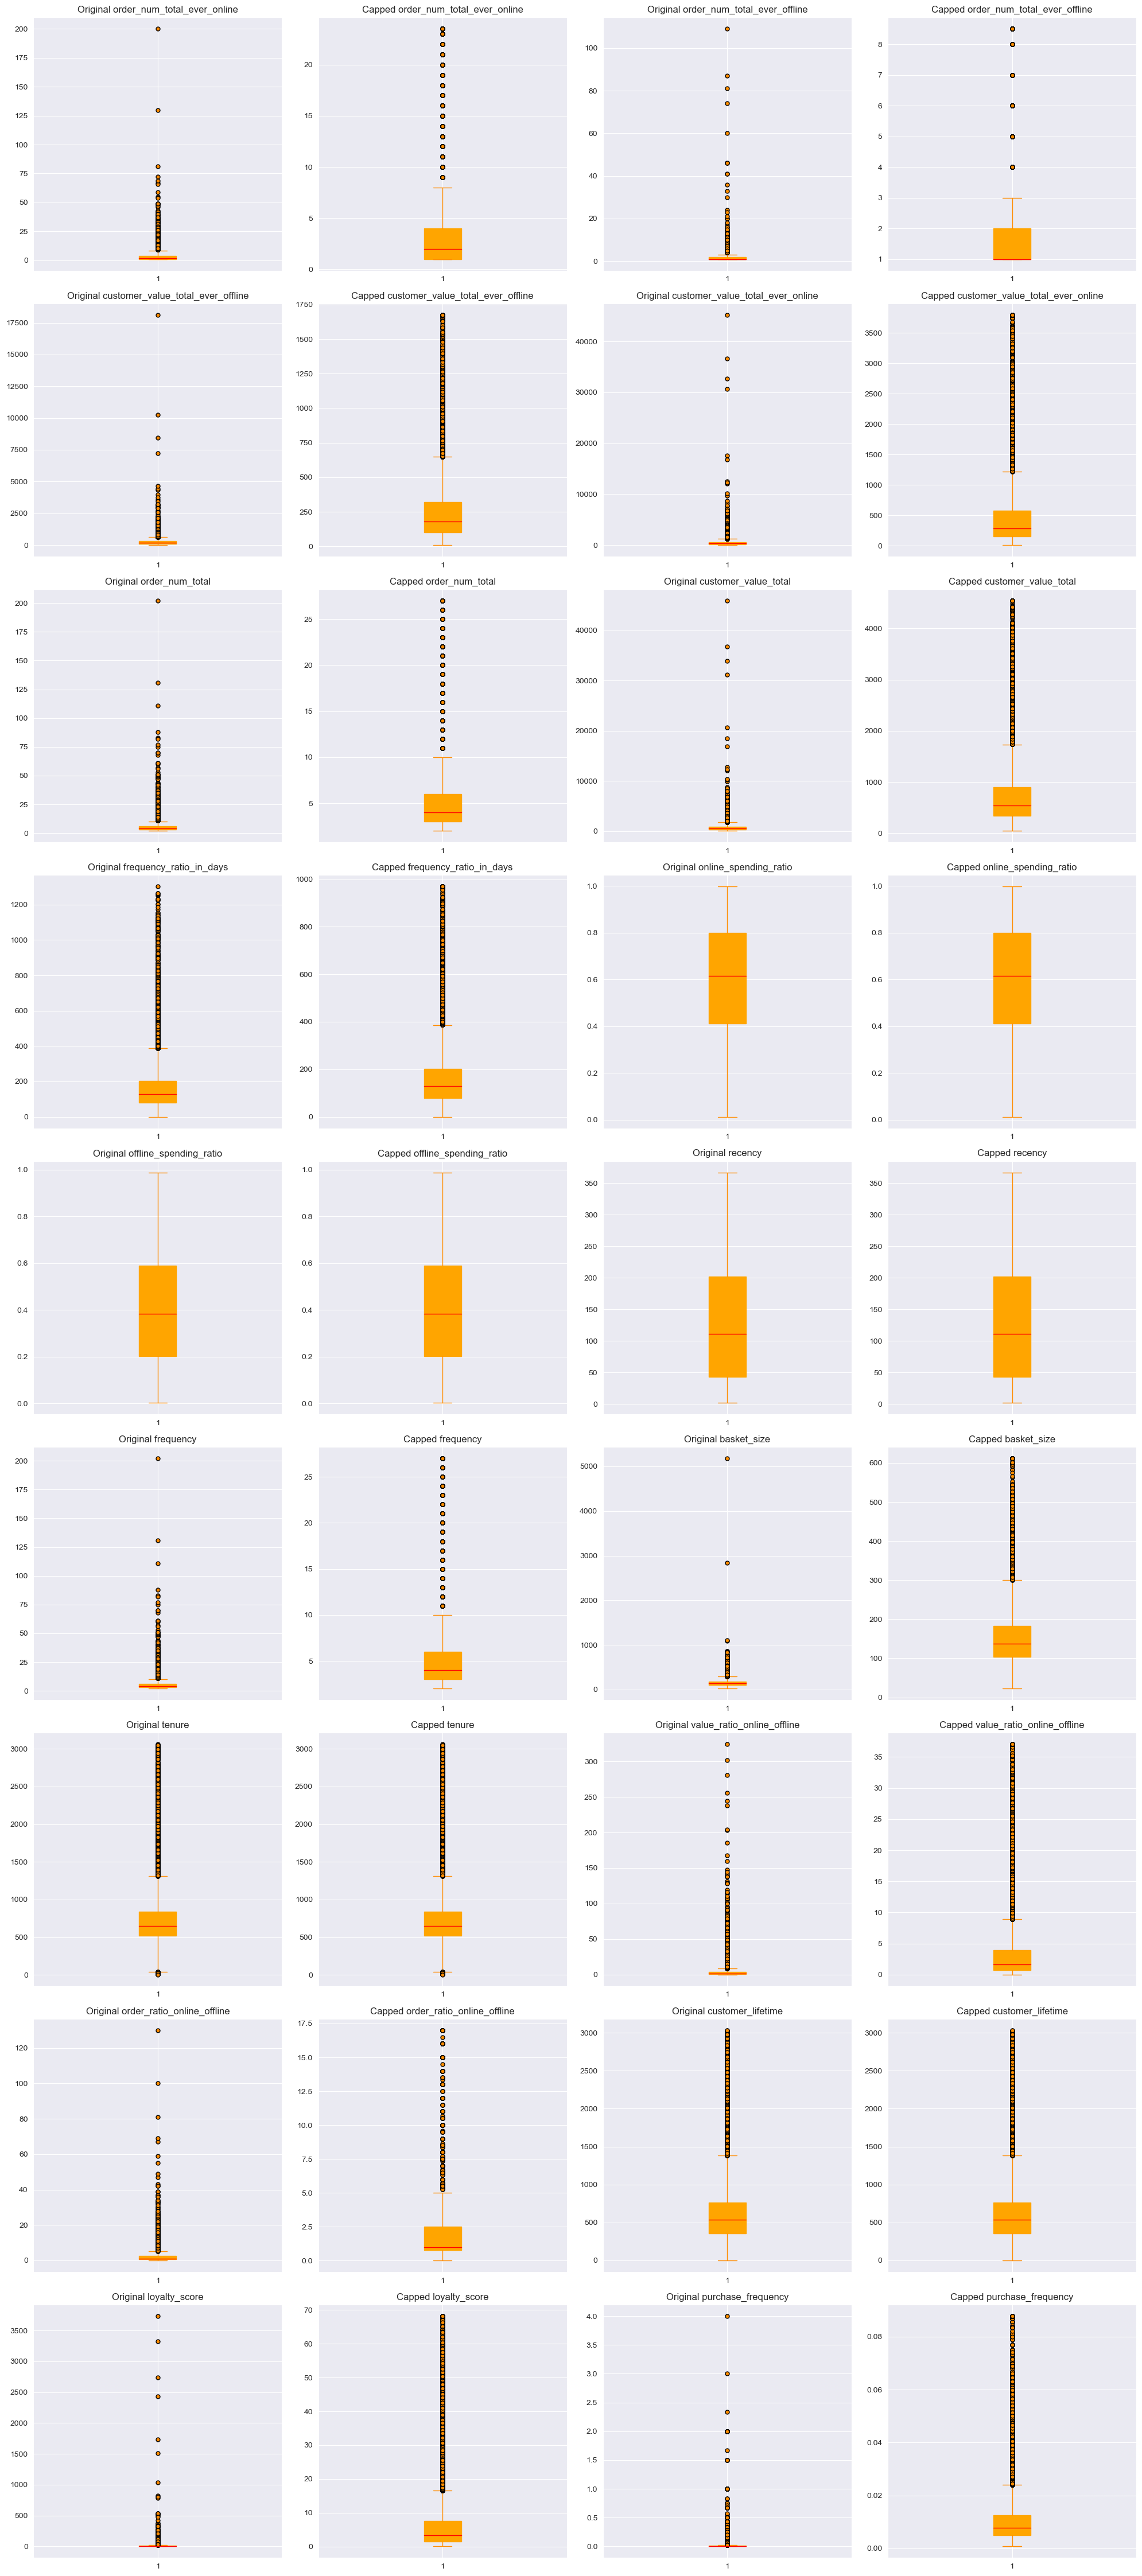

In [72]:

# Numeric feature sayısını hesaplayın
num_features = len(numeric_features)

# Her satırda kaç grafik olacağını belirleyin (örneğin 4 grafik)
graphs_per_row = 4

# Subplot sayısını belirleyin
rows = (num_features * 2 + graphs_per_row - 1) // graphs_per_row

fig, axs = plt.subplots(rows, graphs_per_row, figsize=(20, 5*rows), facecolor='white')

# Her bir numeric feature için grafik oluşturun
for i, feature in enumerate(numeric_features):
    # Orijinal verinin boxplot'u
    row = (2*i) // graphs_per_row
    col = (2*i) % graphs_per_row
    axs[row, col].boxplot(df[feature].dropna(), patch_artist=True,
                          boxprops=dict(facecolor='orange', color='orange'),
                          whiskerprops=dict(color='darkorange'),
                          capprops=dict(color='darkorange'),
                          medianprops=dict(color='red'),
                          flierprops=dict(markerfacecolor='darkorange', marker='o', markersize=5))
    axs[row, col].set_title(f'Original {feature}')
    
    # Capped verinin boxplot'u
    row = (2*i + 1) // graphs_per_row
    col = (2*i + 1) % graphs_per_row
    axs[row, col].boxplot(capped_data_iqr[feature].dropna(), patch_artist=True,
                          boxprops=dict(facecolor='orange', color='orange'),
                          whiskerprops=dict(color='darkorange'),
                          capprops=dict(color='darkorange'),
                          medianprops=dict(color='red'),
                          flierprops=dict(markerfacecolor='darkorange', marker='o', markersize=5))
    axs[row, col].set_title(f'Capped {feature}')

# Kullanılmayan aksları gizleyin
for j in range(2*num_features, rows*graphs_per_row):
    fig.delaxes(axs.flatten()[j])

plt.tight_layout()
plt.show()

### Rule Based Classification

In [73]:
rfm = df[['ID','recency', 'frequency', 'customer_value_total', 'tenure', 'basket_size']]

In [74]:
rfm=rfm.set_index("ID")

In [75]:
# Kolon adını 'monetary' olarak değiştirdim.
rfm.rename(columns={'customer_value_total': 'monetary'}, inplace=True)

In [76]:
# qcut kullanarak 1-5 arasında skorlar oluştur
rfm['recency_score'] = pd.qcut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1])  # Recency için skorlar ters sıralandı
rfm['frequency_score'] = pd.qcut(rfm['frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
rfm['monetary_score'] = pd.qcut(rfm['monetary'], 5, labels=[1, 2, 3, 4, 5])



In [77]:
rfm['RFM_score'] = rfm['recency_score'].astype(str) + rfm['frequency_score'].astype(str)

In [78]:
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}

In [79]:
# Segmentleri ata
rfm['segment'] = rfm['RFM_score'].replace(seg_map, regex=True)

In [80]:
rfm.head(20)

,recency,frequency,monetary,tenure,basket_size,recency_score,frequency_score,monetary_score,RFM_score,segment
ID,,,,,,,,,,
0,95,5,939.37,214,187.87,3,4,4,34,loyal_customers
1,105,21,2013.55,1574,95.88,3,5,5,35,loyal_customers
10,311,2,114.98,317,57.49,1,1,1,11,hibernating
100,90,10,899.84,465,89.98,3,5,4,35,loyal_customers
1000,306,5,354.95,781,70.99,1,4,2,14,at_Risk
10000,366,3,217.47,664,72.49,1,2,1,12,hibernating
10001,239,3,499.94,343,166.65,1,2,3,12,hibernating
10002,147,3,460.43,562,153.48,2,2,3,22,hibernating
10003,173,2,401.22,370,200.61,2,1,2,21,hibernating


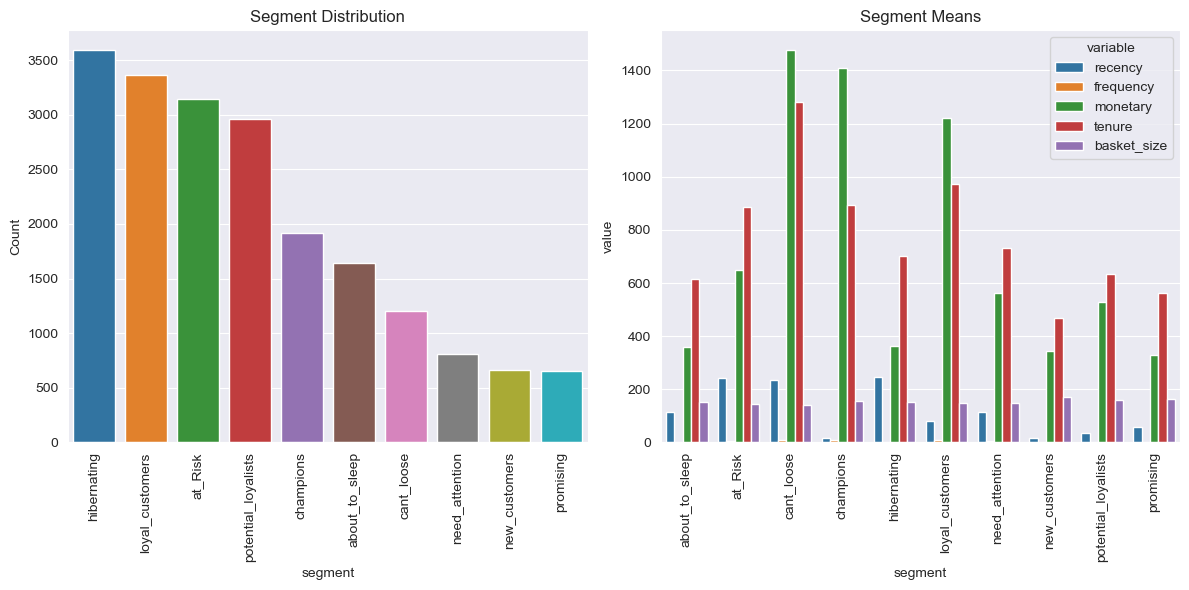

Segment Distribution:
               segment  Count
0          hibernating   3592
1      loyal_customers   3365
2              at_Risk   3144
3  potential_loyalists   2958
4            champions   1921
5       about_to_sleep   1639
6           cant_loose   1199
7       need_attention    811
8        new_customers    660
9            promising    656

Segment Means:
               segment  recency  frequency  monetary  tenure  basket_size
0       about_to_sleep   114.25       2.41    360.53  615.26       150.47
1              at_Risk   241.52       4.47    649.45  884.46       146.18
2           cant_loose   235.39      10.70   1476.95 1281.78       141.24
3            champions    17.10       8.96   1408.84  891.83       156.16
4          hibernating   248.06       2.39    362.25  700.79       152.04
5      loyal_customers    82.52       8.37   1222.68  973.33       148.71
6       need_attention   113.11       3.74    560.77  730.73       150.01
7        new_customers    17.67       2.

In [81]:
# Segmentlerin dağılımı
segment_distribution = rfm['segment'].value_counts().reset_index()
segment_distribution.columns = ['segment', 'Count']

# Segmentlerin ortalamalarını hesaplama
segment_means = rfm.groupby('segment').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': 'mean',
    'tenure' :'mean',
    'basket_size':'mean'
}).reset_index()

# Segmentlerin görselleştirilmesi
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(data=segment_distribution, x='segment', y='Count')
plt.title('Segment Distribution')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.barplot(data=segment_means.melt(id_vars='segment'), x='segment', y='value', hue='variable')
plt.title('Segment Means')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


# Segmentleri ve ortalamalarını gösterdim
print("Segment Distribution:")
print(segment_distribution)
print("\nSegment Means:")
print(segment_means)

### K-Means Cluster

In [82]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [83]:
# K-means için kullanılacak sütunlar
columns_for_clustering = ["loyalty_score", "customer_value_total", "frequency_ratio_in_days", 
                          "num_interested_categories", "recency", "frequency", "basket_size", 
                          "tenure", "channel_loyalty_2", "customer_lifetime"]

In [84]:
clustering_data = df[columns_for_clustering]

In [85]:
# clustering_data=clustering_data.set_index("ID")

In [86]:
clustering_data = clustering_data.fillna(clustering_data.median())

In [87]:
# Veriyi standardize edin
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

In [88]:
# Elbow metodu ile ideal grup sayısını belirledim
ssd = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    ssd.append(kmeans.inertia_)

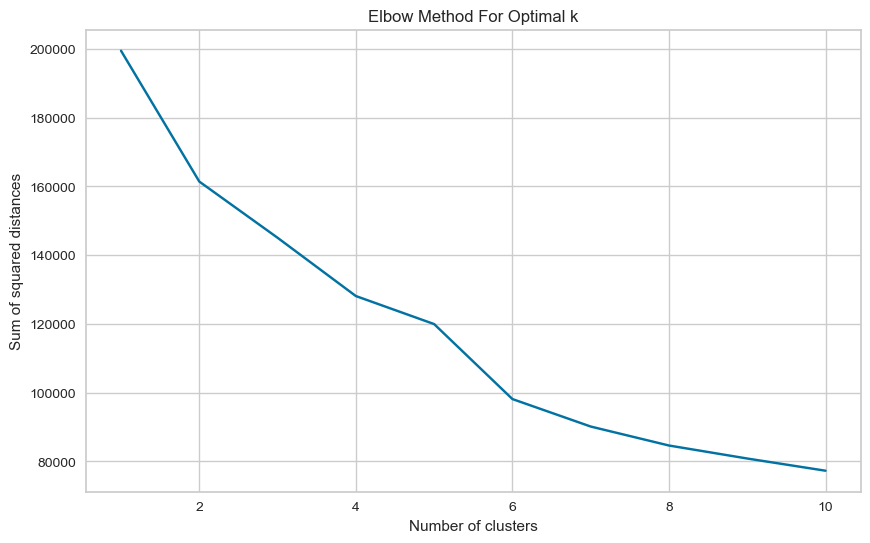

In [89]:
plt.figure(figsize=(10, 6))
plt.plot(K, ssd, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

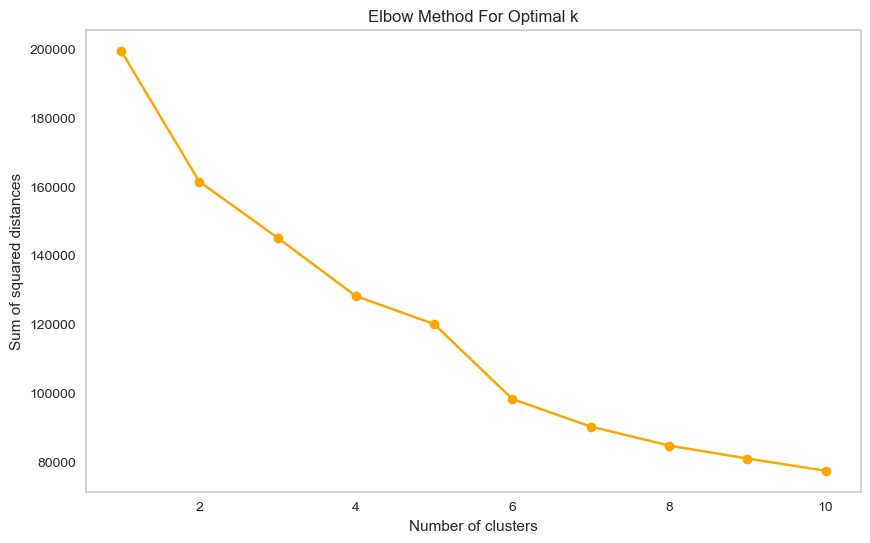

In [90]:


plt.figure(figsize=(10, 6))
plt.plot(K, ssd, 'o-', color='orange')  # Ortadaki çizgiyi turuncu yap ve noktalı gösterim ekle
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')

# Arka planı düz beyaz yapmak için:
plt.gca().set_facecolor('white')  # Grafik alanının arka planını beyaz yap
plt.gcf().patch.set_facecolor('white')  # Grafik figürünün arka planını beyaz yap

# Grid'i kapatmak için:
plt.grid(False)

plt.show()

In [91]:
# Elbow metoduna göre ideal k değeri seçildikten sonra
k = 5  
kmeans = KMeans(n_clusters=k, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_data)

In [92]:
# Küme merkezlerini ve kümeleri alma
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

In [93]:
# Her küme için merkezi değerleri DataFrame olarak gösterme
centroids_df = pd.DataFrame(scaler.inverse_transform(centroids), columns=columns_for_clustering)


In [123]:
# Kümeleri isimlendirme
cluster_names = {
    0: "Loyal Spenders",
    1: "High-Value Champions",
    2: "Moderate Shoppers",
    3: "Occasional Shoppers",
    4: "Long-Term Patrons"
}

In [124]:
# Kümelere isim atama
df['Cluster'] = labels
df['Cluster_Name'] = df['Cluster'].map(cluster_names)

In [96]:
# Kümelerin merkez değerlerini gösterme
pd.DataFrame(centroids_df)

,loyalty_score,customer_value_total,frequency_ratio_in_days,num_interested_categories,recency,frequency,basket_size,tenure,channel_loyalty_2,customer_lifetime
0,7.53,714.03,125.46,1.82,105.71,4.65,160.11,626.39,0.00,520.68
1,78.86,3182.29,71.80,2.91,87.18,19.51,183.16,1333.92,0.71,1246.74
2,6.76,664.56,147.04,1.65,74.45,4.31,158.01,608.90,1.00,534.45
3,3.26,490.45,123.44,1.34,271.55,3.57,139.18,666.08,0.73,394.53
4,2.52,700.39,418.62,1.54,157.85,5.57,129.63,1944.99,0.27,1787.14


In [125]:
df["Cluster_Name"].value_counts()

Cluster_Name
Moderate Shoppers       7909
Loyal Spenders          4641
Occasional Shoppers     4375
Long-Term Patrons       2153
High-Value Champions     867
Name: count, dtype: int64

In [98]:
print(df[['ID', 'Cluster', 'Cluster_Name']].head())

     ID  Cluster         Cluster_Name
0     0        0      Moderate Buyers
1     1        1  Infrequent Shoppers
2    10        3  Occasional Spenders
3   100        0      Moderate Buyers
4  1000        3  Occasional Spenders


In [99]:
print(kmeans.inertia_)

119930.293749949


In [100]:
# PCA ile boyut indirgeme ve görselleştirme
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['cluster'] = df['cluster']

# Principal Component Analysis (PCA), yüksek boyutlu veri setlerini daha düşük boyutlu bir uzaya projekte ederek veri 
# setinin boyutunu azaltan istatistiksel bir tekniktir. PCA, verideki varyansı maksimum yapan doğrusal kombinasyonları 
# (başlıca bileşenler) bulur. Bu teknik, veri setindeki temel yapıyı ve ilişkileri koruyarak boyut azaltımı sağlar.

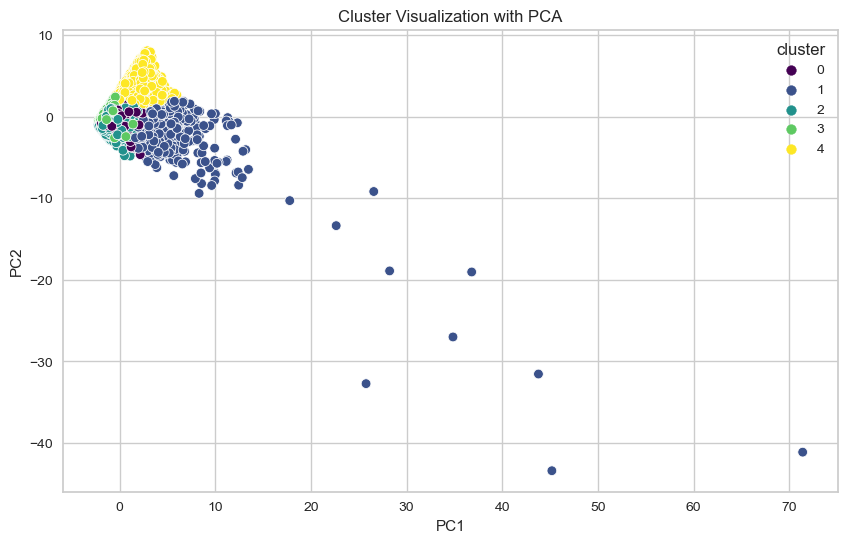

In [101]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=pca_df, palette='viridis')
plt.title('Cluster Visualization with PCA')
plt.show()


###### Grafik, K-means kümeleme sonuçlarının PCA ile iki boyutta görselleştirilmesini sağlar

* Cluster 0 (Mor) ve Cluster 1 (Lacivert):

Bu iki küme, grafiğin sol tarafında ve birbirine oldukça yakın konumlanmıştır. Bu, bu kümelerin birbirine benzer özellikler taşıyan veri noktalarından oluştuğunu gösterebilir.
Cluster 0, Cluster 1'den biraz daha yoğun ve kompakt görünüyor.

* Cluster 2 (Yeşil):

Bu küme, grafiğin ortasında yer alır ve oldukça geniş bir alana yayılmıştır.
Cluster 2, veri noktalarının geniş bir dağılımına sahip olabilir ve bu nedenle daha fazla varyans içerir.

* Cluster 3 (Açık Yeşil):

Cluster 2'nin hemen yanında bulunur ve yine geniş bir dağılıma sahiptir.
Cluster 3, Cluster 2 ile benzer bir dağılıma sahip olabilir ancak farklı özelliklere sahip veri noktalarından oluşur.

* Cluster 4 (Sarı):

Grafiğin sağ tarafında ve oldukça dağınık bir yapıya sahip. Bu kümenin veri noktaları, diğer kümelerden daha uzak ve geniş bir alana yayılmıştır.
Cluster 4, daha çeşitli ve heterojen veri noktalarından oluşuyor olabilir.

Negatif PC2 değerleri, verinin belirli özelliklerinin bu kümeyi diğer kümelerden ayıran önemli faktörler olduğunu gösteriyo
ve bu özelliklerin kümedeki veri noktaları üzerinde negatif etkileri olduğunu belirtiyo. 
Bu, veriyi daha iyi anlamak ve analiz etmek için önemli bir bilgi.

In [102]:
"""

# Önem derecelerini hesaplama ve görselleştirme
feature_importance = np.std(scaled_data, axis=0)
importance_df = pd.DataFrame({
    'Feature': columns_for_clustering,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance in K-means Clustering')
plt.show()

"""

"\n\n# Önem derecelerini hesaplama ve görselleştirme\nfeature_importance = np.std(scaled_data, axis=0)\nimportance_df = pd.DataFrame({\n    'Feature': columns_for_clustering,\n    'Importance': feature_importance\n}).sort_values(by='Importance', ascending=False)\n\nplt.figure(figsize=(10, 6))\nsns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')\nplt.title('Feature Importance in K-means Clustering')\nplt.show()\n\n"

In [103]:
"""
# Alternatif Cluster görseli (TSNE)
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(scaled_data)
tsne_df = pd.DataFrame(data=tsne_results, columns=['TSNE1', 'TSNE2'])
tsne_df['cluster'] = df['cluster']

plt.figure(figsize=(10, 6))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='cluster', data=tsne_df, palette='viridis', alpha=0.7)
plt.title('Cluster Visualization with t-SNE')
plt.show()

"""

"\n# Alternatif Cluster görseli (TSNE)\nfrom sklearn.manifold import TSNE\n\ntsne = TSNE(n_components=2, random_state=42)\ntsne_results = tsne.fit_transform(scaled_data)\ntsne_df = pd.DataFrame(data=tsne_results, columns=['TSNE1', 'TSNE2'])\ntsne_df['cluster'] = df['cluster']\n\nplt.figure(figsize=(10, 6))\nsns.scatterplot(x='TSNE1', y='TSNE2', hue='cluster', data=tsne_df, palette='viridis', alpha=0.7)\nplt.title('Cluster Visualization with t-SNE')\nplt.show()\n\n"

#####  Neden Cluster dağılım görüntüleri farklı?

* PCA: Veri setindeki en büyük varyansı açıklayan doğrusal bileşenleri bulur. Küresel yapı hakkında bilgi verir.
* t-SNE: Yerel yapıyı korumaya odaklanır ve yüksek boyutlu verilerdeki benzerlikleri daha iyi görselleştirmek için kullanılır.

* PCA: Lineer bir yaklaşım kullanır, bu nedenle sadece doğrusal ilişkileri modeller.
* t-SNE: Doğrusal olmayan bir yaklaşım kullanır ve genellikle kümeler arasındaki karmaşık ilişkileri daha iyi gösterir.

* PCA: İlk bileşen en büyük varyansı açıklar ve mesafeleri korur.
* t-SNE: Varyansı optimize etmez, bunun yerine yerel ilişkileri korur ve veri noktalarının yakınlıklarını korumaya çalışır.

In [104]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree modeli ile feature importance hesapladım
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(scaled_data, df['cluster'])


DecisionTreeClassifier(random_state=42)

In [105]:
# Feature importance grafiği
feature_importance = pd.DataFrame({'Feature': columns_for_clustering, 'Importance': tree_model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

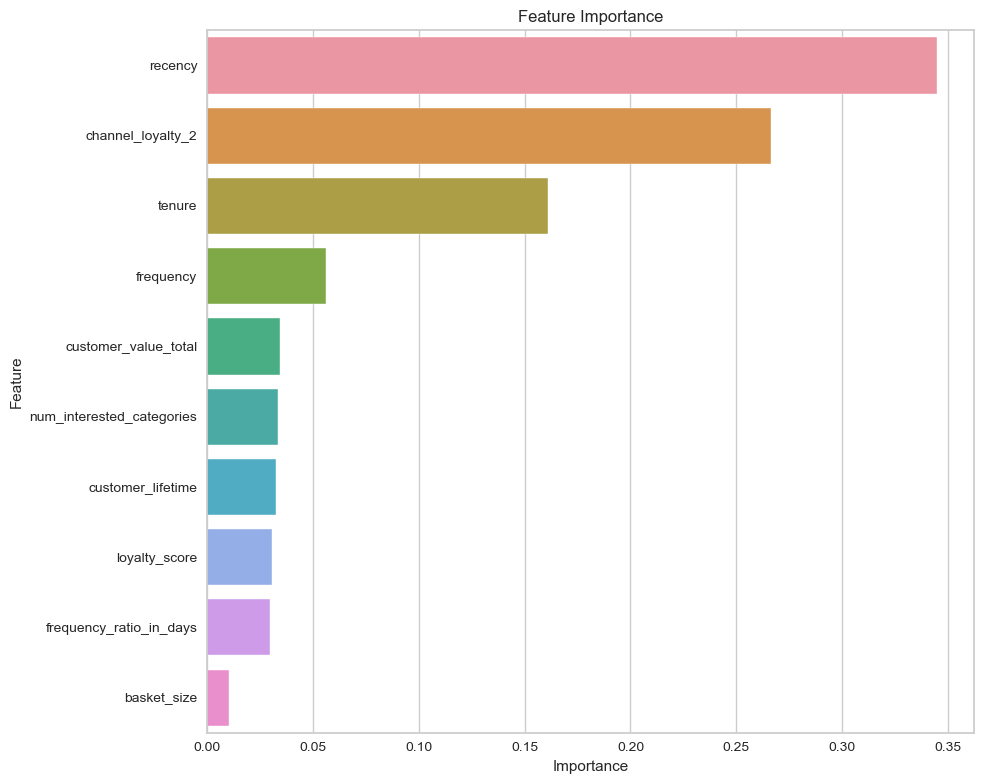

In [106]:
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

In [107]:
clustering_data.head()

,loyalty_score,customer_value_total,frequency_ratio_in_days,num_interested_categories,recency,frequency,basket_size,tenure,channel_loyalty_2,customer_lifetime
0,21.95,939.37,23.80,1,95,5,187.87,214,0,119
1,26.86,2013.55,69.95,4,105,21,95.88,1574,0,1469
2,0.73,114.98,3.00,3,311,2,57.49,317,0,6
3,19.35,899.84,37.50,1,90,10,89.98,465,0,375
4,2.27,354.95,95.00,1,306,5,70.99,781,1,475


In [108]:
clustering_data["km_clusters"]=kmeans.labels_

In [109]:
clustering_data["km_clusters"].value_counts()

km_clusters
2    7909
0    4641
3    4375
4    2153
1     867
Name: count, dtype: int64

In [127]:
df.to_excel("C:/Users/User/Desktop/SonFloSon.xlsx", index=False)

In [126]:
df.head()

,ID,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,order_num_total,customer_value_total,frequency_ratio_in_days,online_spending_ratio,offline_spending_ratio,num_interested_categories,recency,frequency,basket_size,tenure,channel_loyalty,channel_loyalty_2,value_ratio_online_offline,order_ratio_online_offline,customer_lifetime,offline_last_order_recency,online_last_order_recency,online_order_frequency,offline_order_frequency,loyalty_score,is_active_customer,churn,purchase_frequency,cluster,Cluster,Cluster_Name
0,0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4,1,139.99,799.38,[KADIN],5,939.37,23.80,0.85,0.15,1,95,5,187.87,214,order_num_total_ever_online,0,5.71,4.00,119,95,100,0.03,0.01,21.95,False,0,0.04,0,0,Loyal Spenders
1,1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19,2,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",21,2013.55,69.95,0.92,0.08,4,105,21,95.88,1574,order_num_total_ever_online,0,11.59,9.50,1469,508,105,0.01,0.00,26.86,False,0,0.01,1,1,High-Value Champions
2,10,ae608ece-c9d8-11ea-a31e-000d3a38a36f,Ios App,Offline,2020-07-19,2020-07-25,2020-07-19,2020-07-25,1,1,74.99,39.99,"[AKTIFCOCUK, COCUK, KADIN]",2,114.98,3.00,0.35,0.65,3,311,2,57.49,317,order_num_total_ever_online,0,0.53,1.00,6,311,317,0.17,0.17,0.73,False,0,0.33,3,3,Occasional Shoppers
3,100,b74c85fa-43a0-11eb-806e-000d3a38a36f,Android App,Offline,2020-02-22,2021-03-03,2020-12-21,2021-03-03,6,4,334.96,564.88,[COCUK],10,899.84,37.50,0.63,0.37,1,90,10,89.98,465,order_num_total_ever_online,0,1.69,1.50,375,90,162,0.02,0.01,19.35,False,0,0.03,0,0,Loyal Spenders
4,1000,04064990-a414-11e9-a2fc-000d3a38a36f,Android App,Android App,2019-04-12,2020-07-30,2020-07-30,2020-03-10,1,4,269.96,84.99,[ERKEK],5,354.95,95.00,0.24,0.76,1,306,5,70.99,781,order_num_total_ever_offline,1,0.31,0.25,475,448,306,0.00,0.01,2.27,False,0,0.01,3,3,Occasional Shoppers


### Hierarchical Clustering

In [112]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster


In [113]:
# Hiyerarşik kümeleme için linkage matrisi oluşturma adımı

linked = linkage(scaled_data, method='ward')

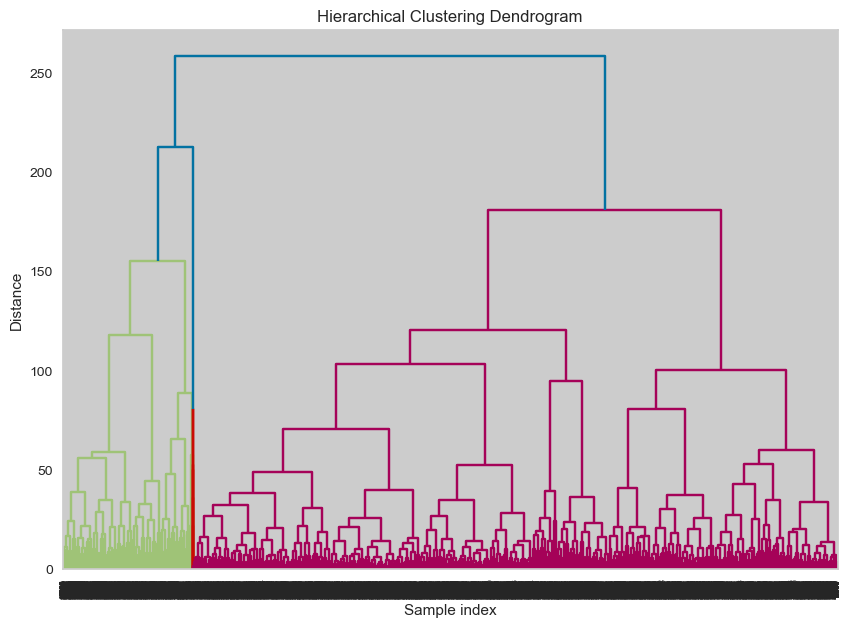

In [114]:

# Dendrogram oluşturma
plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()



In [115]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs

cluster_hc= AgglomerativeClustering(n_clusters=4, linkage="ward", metric="euclidean").fit(scaled_data)

In [116]:
cluster_hc.labels_

array([3, 0, 3, ..., 3, 0, 1], dtype=int64)

In [117]:
clustering_data["hc_clusters"]=cluster_hc.labels_

In [118]:
clustering_data.head()

,loyalty_score,customer_value_total,frequency_ratio_in_days,num_interested_categories,recency,frequency,basket_size,tenure,channel_loyalty_2,customer_lifetime,km_clusters,hc_clusters
0,21.95,939.37,23.80,1,95,5,187.87,214,0,119,0,3
1,26.86,2013.55,69.95,4,105,21,95.88,1574,0,1469,1,0
2,0.73,114.98,3.00,3,311,2,57.49,317,0,6,3,3
3,19.35,899.84,37.50,1,90,10,89.98,465,0,375,0,3
4,2.27,354.95,95.00,1,306,5,70.99,781,1,475,3,1


In [119]:
clustering_data["hc_clusters"].value_counts()

hc_clusters
1    10697
3     5888
0     3354
2        6
Name: count, dtype: int64

In [120]:
cluster_crosstab=pd.crosstab(clustering_data["km_clusters"],clustering_data["hc_clusters"])

In [121]:
cluster_crosstab

hc_clusters,0,1,2,3
km_clusters,,,,
0,254,58,0,4329
1,714,118,6,29
2,452,7457,0,0
3,163,3063,0,1149
4,1771,1,0,381


### Supervised Learning

In [122]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, confusion_matrix
import lightgbm as lgb
import xgboost as xgb

ModuleNotFoundError: No module named 'lightgbm'

In [ ]:
# "At_Risk" olan kümeyi hedef değişken olarak belirliyoruz.
at_risk_cluster = 0
df['Target'] = (df['Cluster'] == at_risk_cluster).astype(int)

In [ ]:
df.head()

In [ ]:
# Eğitim ve test verileri

X = df[columns_for_clustering]
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
df['Target'].value_counts()

In [ ]:
# Algoritmalar
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
   #'LightGBM': lgb.LGBMClassifier(random_state=42),
   #'XGBoost': xgb.XGBClassifier(random_state=42)
}

In [ ]:

"""
# Modelleri eğitme ve değerlendirme

results = {}
feature_importances = {}

for model_name, model in models.items():
    # Cross-validation kullanarak model performansını değerlendirme
    
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    results[model_name] = {
        'accuracy': accuracy,
        'recall': recall,
        'precision': precision
    }
    
"""    

In [ ]:
"""
# Feature importance
if hasattr(model, 'get_feature_importance'):
        feature_importances[model_name] = model.get_feature_importance()
else:
        feature_importances[model_name] = model.feature_importances_
        
"""        

In [ ]:
# Sonuçları yazdırma
for model_name, metrics in results.items():
    print(f"{model_name} - Accuracy: {metrics['accuracy']:.2f}, Recall: {metrics['recall']:.2f}, Precision: {metrics['precision']:.2f}")

In [ ]:
"""
# Feature importance plot
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

for ax, (model_name, importances) in zip(axes, feature_importances.items()):
    ax.barh(columns_for_clustering, importances)
    ax.set_title(f"{model_name} Feature Importances")

plt.tight_layout()
plt.show()

"""

In [ ]:
# En iyi modelin seçimi için bir değişken oluşturma
best_model_name = None
best_accuracy = 0

In [ ]:
# En iyi modeli belirleme
if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_name = model_name

In [ ]:
# En iyi model ile "At_Risk" olanları tahmin etme
best_model = models[best_model_name]
df['Prediction'] = best_model.predict(X)

In [ ]:
# "At_Risk" olarak tespit edilenlerin ID'lerini listeleme
at_risk_ids = df[df['Prediction'] == 1]['ID']
print("At_Risk olarak tespit edilenlerin ID'leri:")
print(at_risk_ids.tolist())

In [ ]:
# Özel İndirim Kuponları: At_Risk müşterilere özel indirim kuponları verilebilir.
# Ücretsiz Kargo: Belirli bir süre için ücretsiz kargo teklifi sunulabilir.
# Kişiselleştirilmiş Tavsiyeler: Özel ürün tavsiyeleri sunulabilir.
# VIP Etkinlik Davetiyeleri: Özel etkinliklere davetiye gönderilebilir.
# Özel Hediye Paketleri: Satın alımlarıyla birlikte küçük hediyeler sunulabilir.
# Erken Erişim: Yeni ürünlere veya özel koleksiyonlara erken erişim hakkı tanıyarak müşteri memnuniyetini artırabiliriz.
# Sadakat Programı: Bu müşterilere sadakat puanları veya ekstra ödüller vererek bağlılıklarını artırabilirz.


In [ ]:
# Mobil Uygulama Bildirimleri
# Web Sitesi Bildirimleri
# SMS Kampanyaları
# Özel Erişim Kodları
# Sosyal Medya Grupları
# Mail 

#### Channel_Loyalty Predicting

In [ ]:
features_for_channel = ['order_num_total_ever_online', 'order_num_total_ever_offline', 'customer_value_total_ever_online', 'customer_value_total_ever_offline', 'basket_size', 'tenure']
target = 'channel_loyalty_2'


In [ ]:
df_channel=df.copy()

In [ ]:
# Eksik verileri kontrol etme ve doldurma
df_channel = df_channel.dropna(subset=features_for_channel + [target])

In [ ]:
X = df_channel[features_for_channel]
y = df_channel[target]

In [ ]:
# Veriyi eğitim ve test setlerine bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Rastgele forest sınıflandırıcısı modeli oluşturma ve eğitme
model_channel = RandomForestClassifier(n_estimators=100, random_state=42)
model_channel.fit(X_train, y_train)

In [ ]:
# Test seti üzerinde tahmin yapma
y_pred = model_channel.predict(X_test)

In [ ]:
# Model performansını değerlendirme
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [ ]:
# Sonuçları görselleştirme
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model_channel.classes_, yticklabels=model_channel.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(class_report)